In [118]:
library(geneBasisR)
library(SingleCellExperiment)
library(tibble) 
library(ggplot2)
library(ggpubr)
library(Seurat)
library(tidyverse)

In [3]:
selected_genes = qs::qread('_targets/objects/genes_stat_100')
sce = qs::qread('_targets/objects/sce_ngo_01')

In [124]:
sce = qs::qread('_targets/objects/sce_ngo_00_other')

In [126]:
panel = c("Mamdc4", "Swap70", "Zfp11", "Ust", "Atf7", "Sorcs2", "Cnot8", 
"Ankra2", "Pcdhb19", "Txnl4b", "Rab11fip5", "Psmd13", "Tcof1", 
"Rab2b", "Smarcc1", "Rdh13", "Tpp2", "Bend7", "Smoc1", "Usp20", 
"Igf1r", "Prkca", "Fbxl5", "Adgb", "Nmt2", "Trpc5", "Syn2", "Cntn3", 
"Ppargc1a", "Nav1", "Zfpm2", "Pias1", "Zfp160", "Abi1", "Atp5b", 
"Zgrf1", "Hat1", "Atad2", "Cdk5rap2", "Gnal", "Fbxw5", "Foxn2", 
"Rpl32", "Arid2", "Kcna1", "Ttll3", "Rock2", "Marchf2", "Thumpd1", 
"Hdac11", "Manbal", "Il1rapl2", "Pcdh15", "Cdc37", "Zdhhc3", 
"R3hcc1", "Txnl4a.1", "Zfp879", "Ccnf", "Atp5e")

In [138]:
(rownames(logcounts(sce)) == rownames(counts(sce))) %>% unique

[1] TRUE

In [140]:
gbr_retain_informative_genes_preselected = function(sce, n=NULL, preselected_genes){
    sce_genes_excluding_panel = rownames(logcounts(sce)) %>% setdiff(preselected_genes)
    sce_excluding_panel = sce[sce_genes_excluding_panel,]
    sce_excluding_panel = geneBasisR::retain_informative_genes(sce, n=n)
    infomrative_genes_excluding_panel = rownames(logcounts(sce_excluding_panel))
    selected_genes = union(preselected_genes, infomrative_genes_excluding_panel)
    sce_filtered = sce[selected_genes,]
    sce_filtered
}

In [139]:
union(c(1), c(2,3,4))

[1] 1 2 3 4

In [119]:
?gene_search

gene_search             package:geneBasisR             R Documentation

_g_e_n_e__s_e_a_r_c_h

_D_e_s_c_r_i_p_t_i_o_n:

     Main function of the package - returns optimal library of the
     selected size.

_U_s_a_g_e:

     gene_search(
       sce,
       genes_base = NULL,
       n_genes_total,
       batch = NULL,
       n.neigh = 5,
       p.minkowski = 3,
       nPC.selection = NULL,
       nPC.all = 50,
       genes.discard = NULL,
       genes.discard_prefix = NULL,
       verbose = TRUE,
       stat_all = NULL
     )
     
_A_r_g_u_m_e_n_t_s:

     sce: SingleCellExperiment object containing gene counts matrix
          (stored in 'logcounts' assay).

genes_base: Character vector specifying base genes to construct first
          Selection graph. Default=NULL in case no genes are supplied.

n_genes_total: Scalar specifying total number of genes to be selected
          (this includes base genes).

   batch: Name of the field in colData(sce) to specify batch. Default
          batch=NULL if no batch is applied.

 n.neigh: Positive integer > 1, specifying number of neighbors to use
          for kNN-graph. Default n.neigh=5.

p.minkowski: Order of Minkowski distance. Default p.minkowski=3.

nPC.selection: Scalar specifying number of PCs to use for Selection
          Graphs. Default nPC=NULL.

 nPC.all: Scalar specifying number of PCs to use for True Graph.
          Default nPC.all=50.

genes.discard: Character vector containing genes to be excluded from
          candidates (note that they still will be used for graphs
          construction. If you want to exclude them from graph
          construction as well, just discard them prior in sce object).
          Default = NULL and no genes will be discarded.

genes.discard_prefix: Character vector containing prefixes of genes to
          be excluded (e.g. Rpl for L ribosomal proteins. Note that
          they still will be used for graphs construction. If you want
          to exclude them from graph construction as well, just discard
          them prior in sce object). Default = NULL and no genes will
          be discarded.

 verbose: Boolean identifying whether intermediate print outputs should
          be returned. Default verbose=TRUE.

stat_all: If True graph and corresponding Minkowski distances have been
          calculated prior to search, provide this data here. It can be
          useful if gene_search is desired to be recycled (e.g. for
          selecting multiple libraries with different inputs such as
          n_genes_total and genes_base) Ensure that colnames =
          c("gene", "dist_all"). Default stat_all=NULL - in case this
          info is not supplied.

_V_a_l_u_e:

     data.frame containing selected genes and corresponding ranks. In
     case genes_base are supplied, rank among them will be assigned
     based on the order they are supplied in the corresponding string.

_E_x_a_m_p_l_e_s:

     require(SingleCellExperiment)
     n_row = 1000
     n_col = 100
     sce = SingleCellExperiment(assays = list(logcounts = matrix(rnorm(n_row*n_col), ncol=n_col)))
     rownames(sce) = as.factor(1:n_row)
     colnames(sce) = c(1:n_col)
     sce$cell = colnames(sce)
     genes = rownames(sce)
     out = gene_search(sce, n_genes_total = 5)

In [6]:
celltype_mapping = get_celltype_mapping(sce , genes.selection = selected_genes$gene, celltype.id = 'polar_label', return.stat = F)

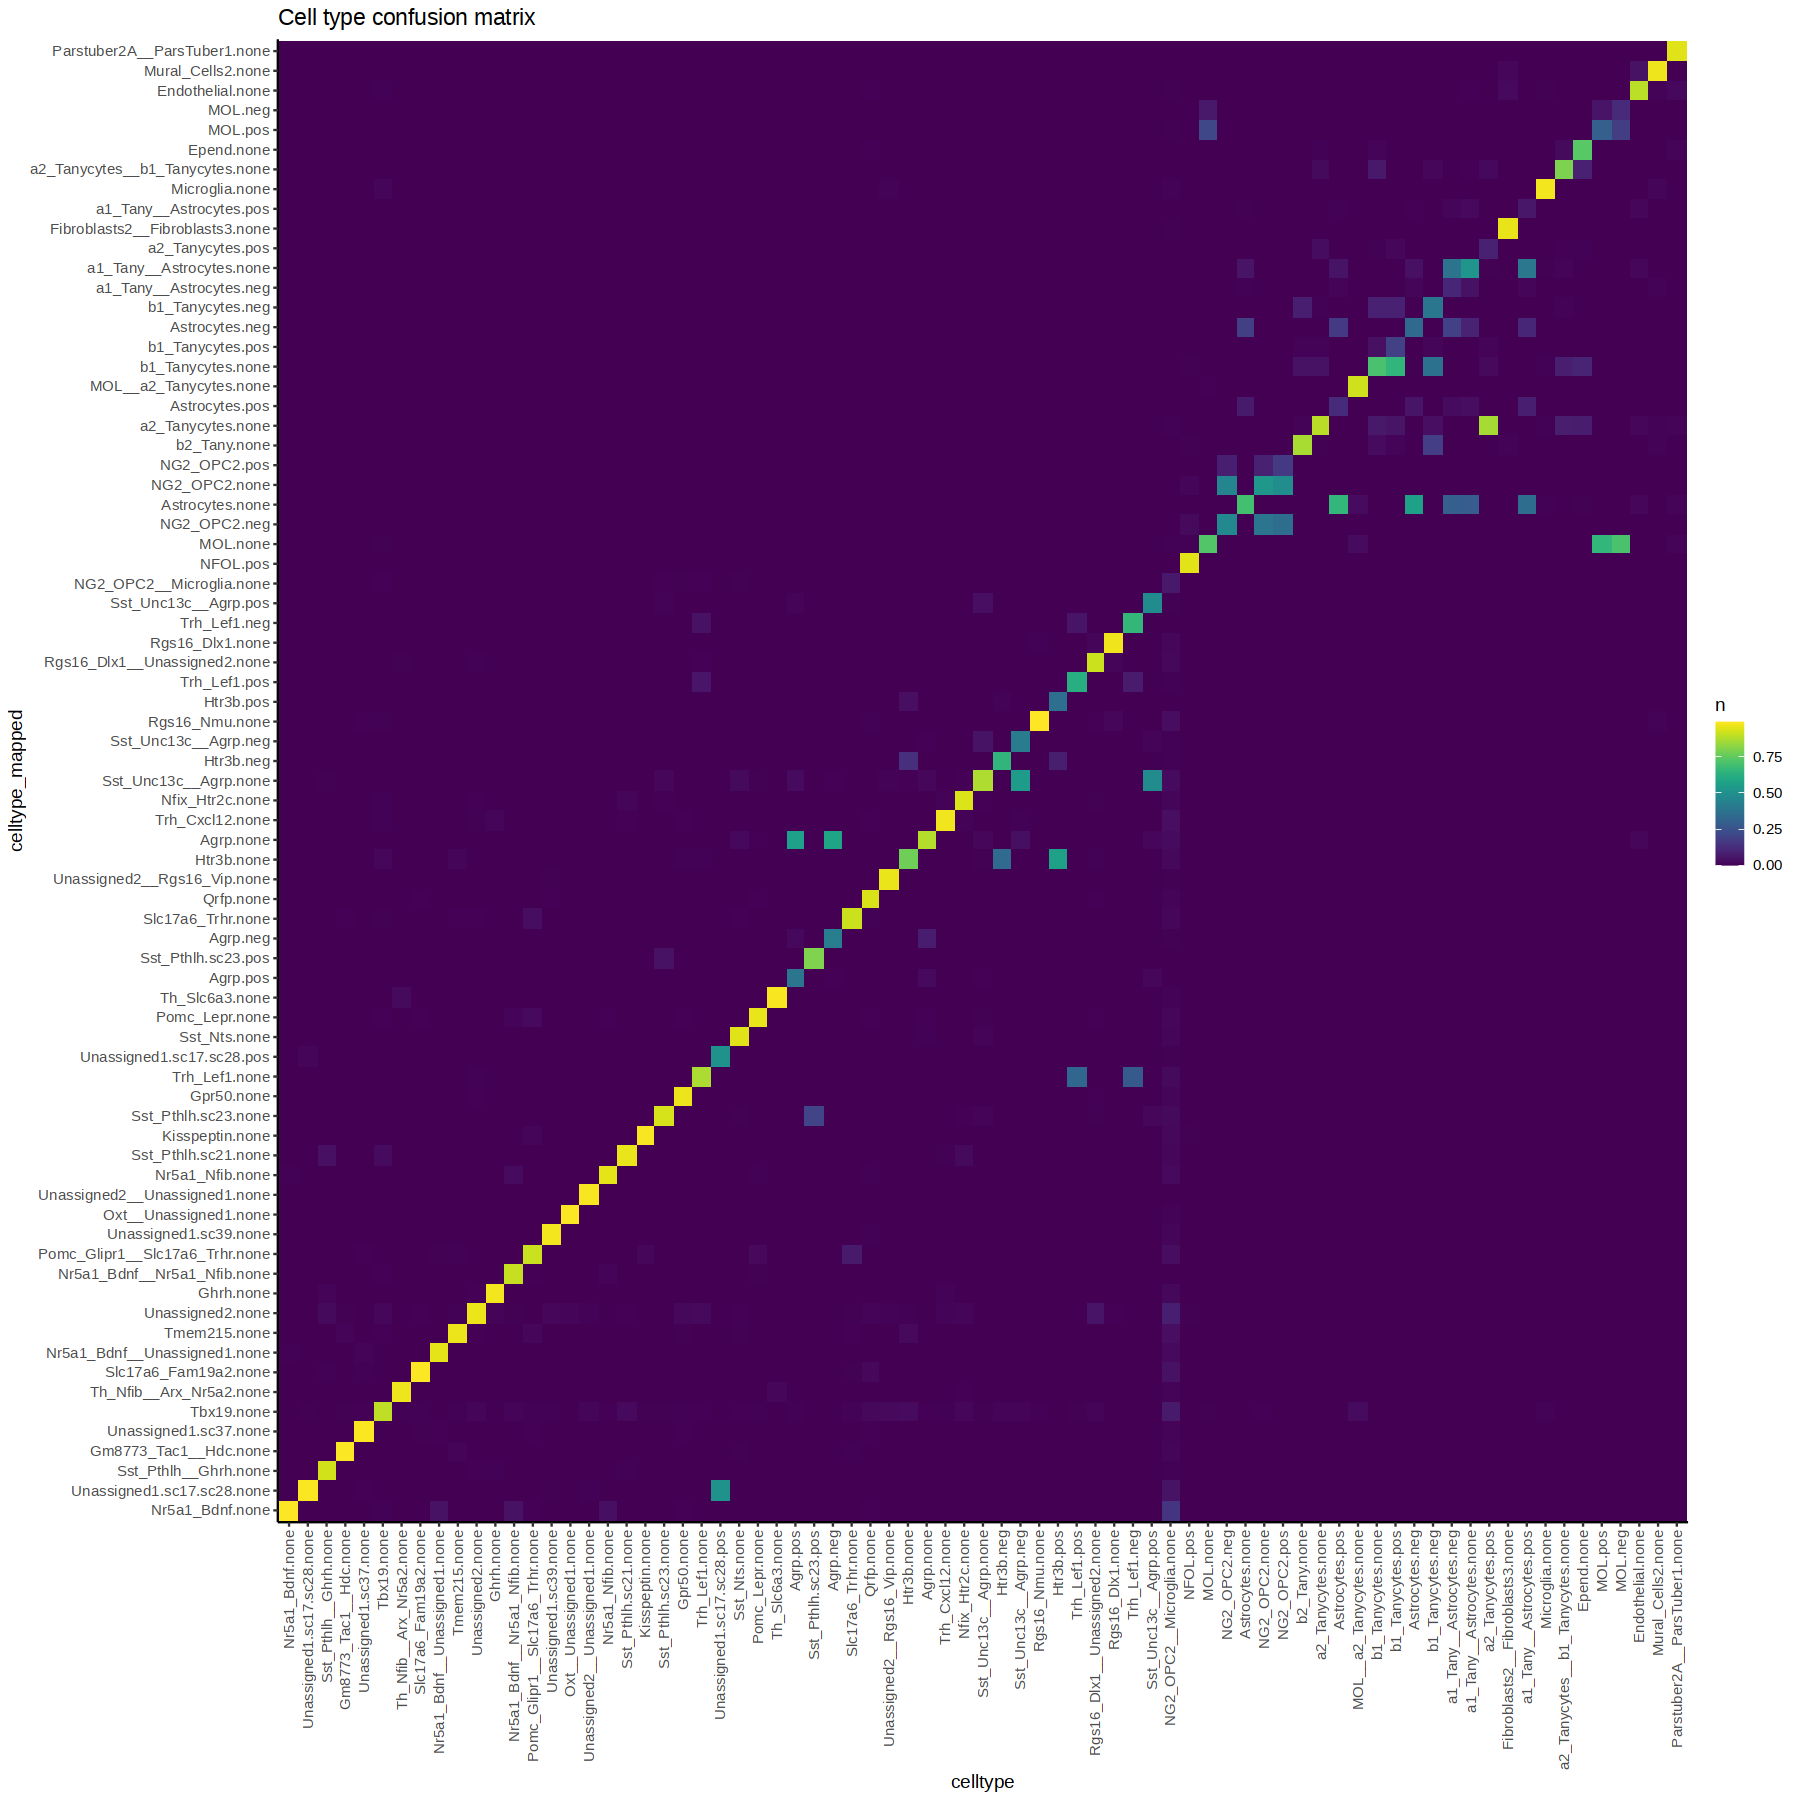

In [9]:
options(repr.plot.width=15, repr.plot.height=15)
p = plot_mapping_heatmap(celltype_mapping$mapping, title = "Cell type confusion matrix")
p

In [25]:
levels = sce$polar_label %>% unique() %>% enframe %>% arrange(value) %>% pull(value)
levels

[1] "a1_Tany__Astrocytes.neg"         "a1_Tany__Astrocytes.none"       
 [3] "a1_Tany__Astrocytes.pos"         "a2_Tanycytes__b1_Tanycytes.none"
 [5] "a2_Tanycytes.none"               "a2_Tanycytes.pos"               
 [7] "Agrp.neg"                        "Agrp.none"                      
 [9] "Agrp.pos"                        "Astrocytes.neg"                 
[11] "Astrocytes.none"                 "Astrocytes.pos"                 
[13] "b1_Tanycytes.neg"                "b1_Tanycytes.none"              
[15] "b1_Tanycytes.pos"                "b2_Tany.none"                   
[17] "Endothelial.none"                "Epend.none"                     
[19] "Fibroblasts2__Fibroblasts3.none" "Ghrh.none"                      
[21] "Gm8773_Tac1__Hdc.none"           "Gpr50.none"                     
[23] "Htr3b.neg"                       "Htr3b.none"                     
[25] "Htr3b.pos"                       "Kisspeptin.none"                
[27] "Microglia.none"                  "MOL__a2_Tanycytes.none"         
[29] "MOL.neg"                         "MOL.none"                       
[31] "MOL.pos"                         "Mural_Cells2.none"              
[33] "Nfix_Htr2c.none"                 "NFOL.pos"                       
[35] "NG2_OPC2__Microglia.none"        "NG2_OPC2.neg"                   
[37] "NG2_OPC2.none"                   "NG2_OPC2.pos"                   
[39] "Nr5a1_Bdnf__Nr5a1_Nfib.none"     "Nr5a1_Bdnf__Unassigned1.none"   
[41] "Nr5a1_Bdnf.none"                 "Nr5a1_Nfib.none"                
[43] "Oxt__Unassigned1.none"           "Parstuber2A__ParsTuber1.none"   
[45] "Pomc_Glipr1__Slc17a6_Trhr.none"  "Pomc_Lepr.none"                 
[47] "Qrfp.none"                       "Rgs16_Dlx1__Unassigned2.none"   
[49] "Rgs16_Dlx1.none"                 "Rgs16_Nmu.none"                 
[51] "Slc17a6_Fam19a2.none"            "Slc17a6_Trhr.none"              
[53] "Sst_Nts.none"                    "Sst_Pthlh__Ghrh.none"           
[55] "Sst_Pthlh.sc21.none"             "Sst_Pthlh.sc23.none"            
[57] "Sst_Pthlh.sc23.pos"              "Sst_Unc13c__Agrp.neg"           
[59] "Sst_Unc13c__Agrp.none"           "Sst_Unc13c__Agrp.pos"           
[61] "Tbx19.none"                      "Th_Nfib__Arx_Nr5a2.none"        
[63] "Th_Slc6a3.none"                  "Tmem215.none"                   
[65] "Trh_Cxcl12.none"                 "Trh_Lef1.neg"                   
[67] "Trh_Lef1.none"                   "Trh_Lef1.pos"                   
[69] "Unassigned1.sc17.sc28.none"      "Unassigned1.sc17.sc28.pos"      
[71] "Unassigned1.sc37.none"           "Unassigned1.sc39.none"          
[73] "Unassigned2__Rgs16_Vip.none"     "Unassigned2__Unassigned1.none"  
[75] "Unassigned2.none"

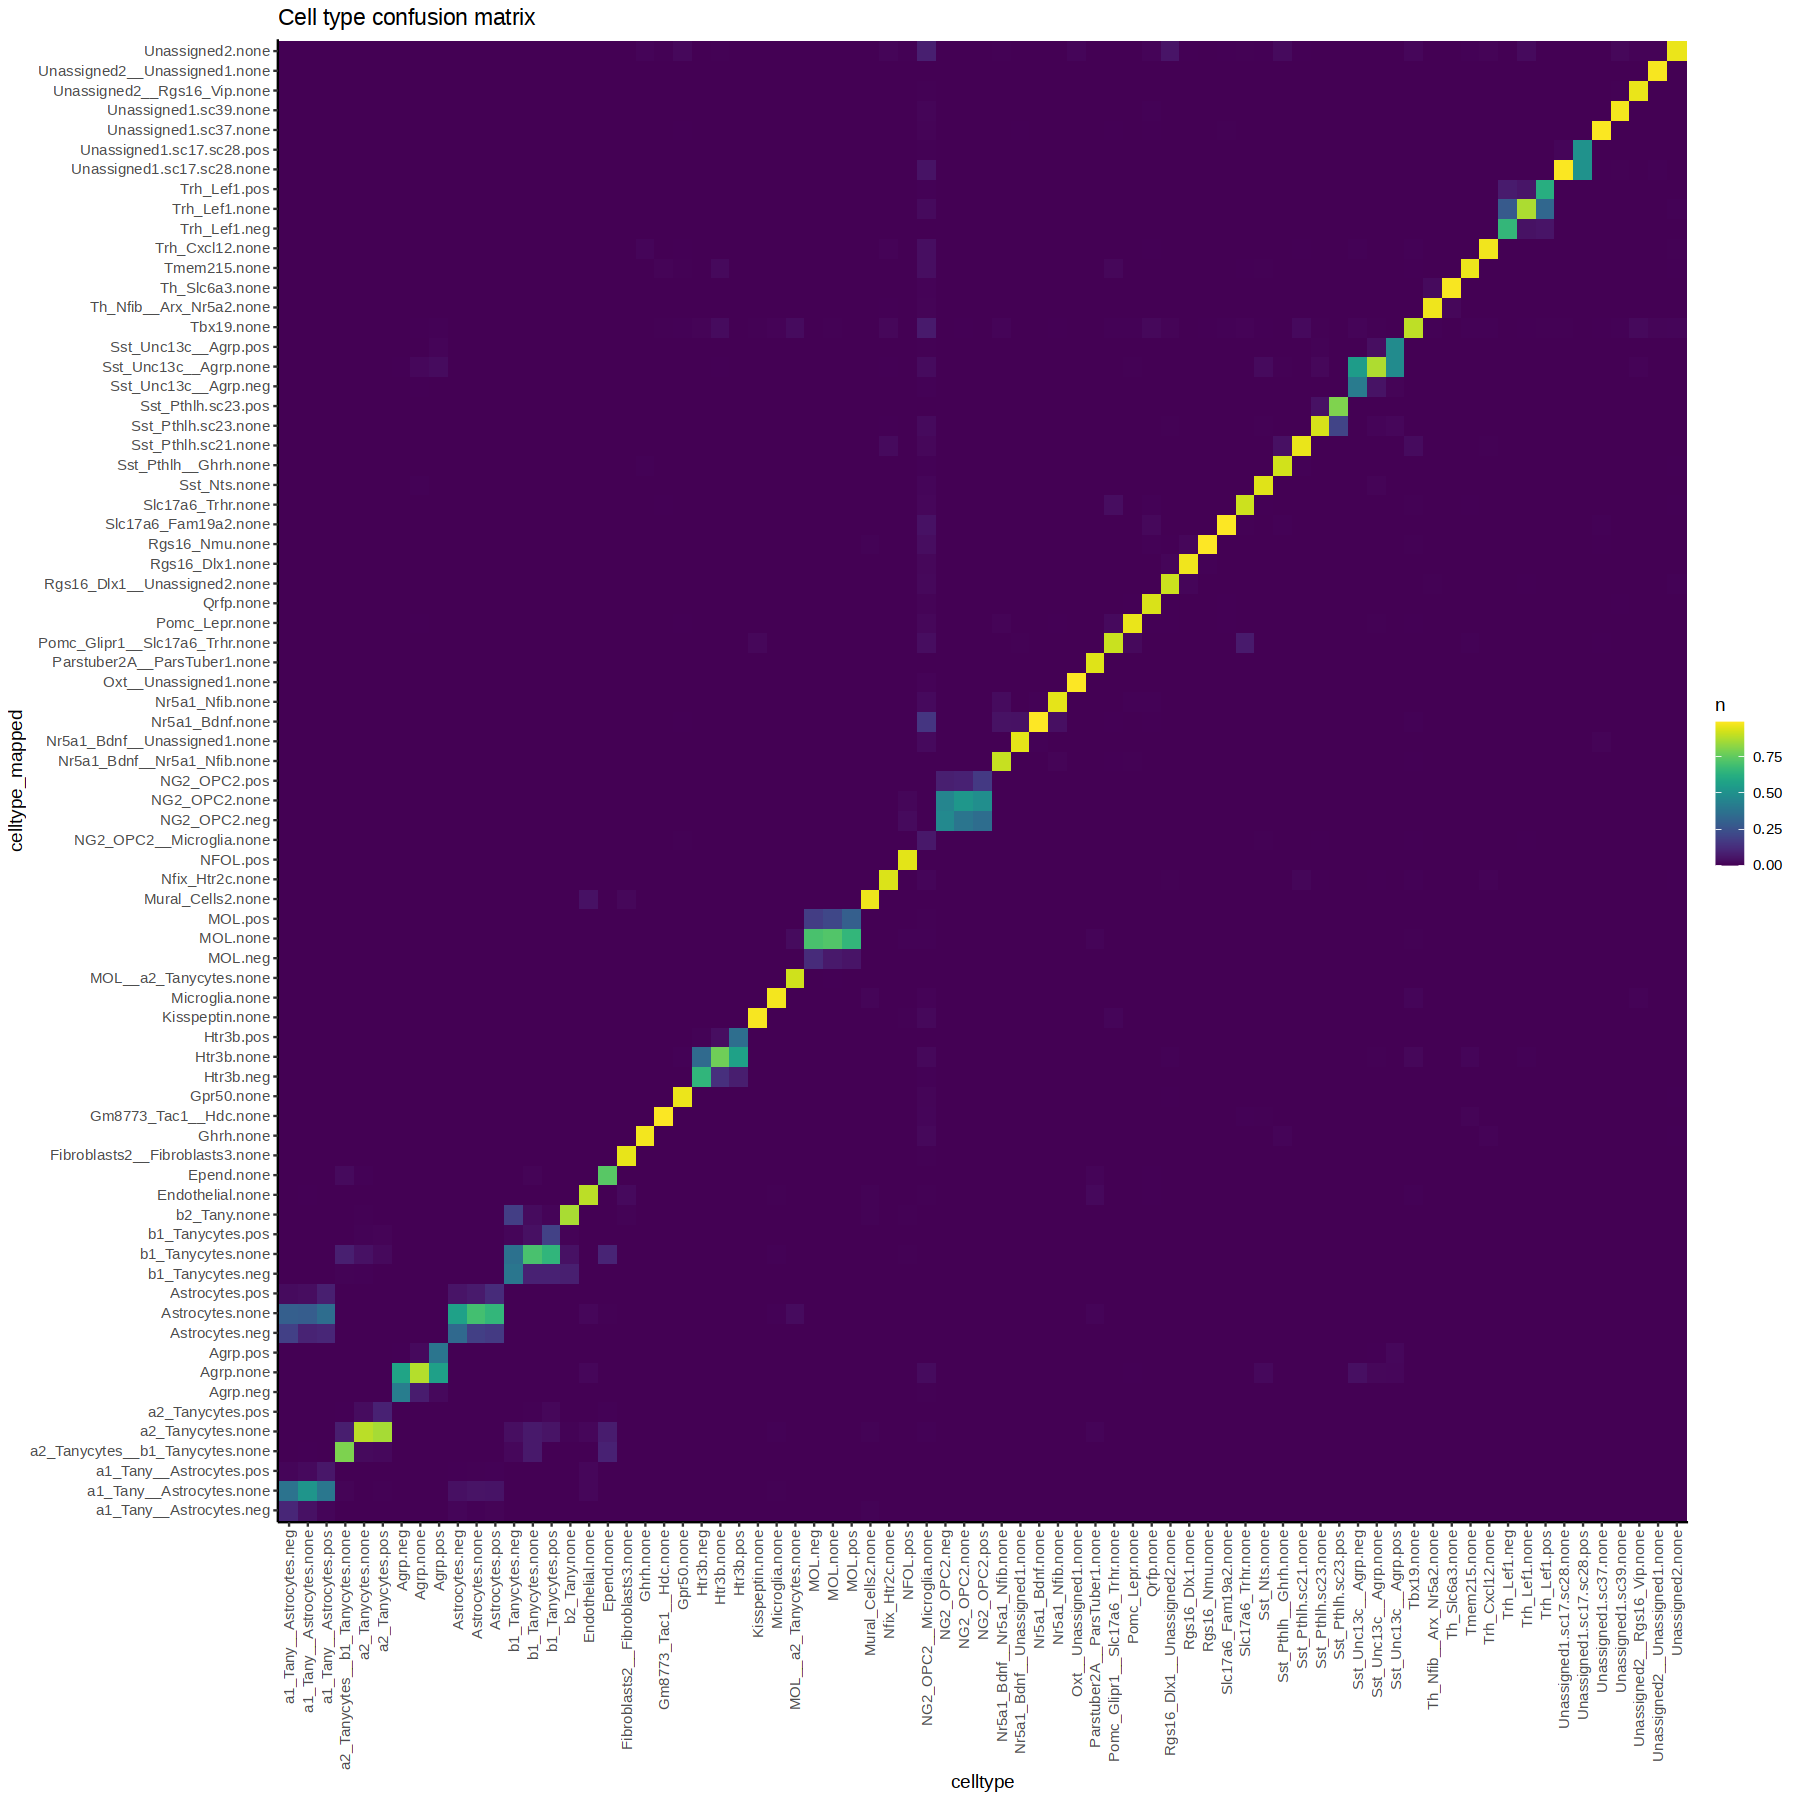

In [26]:
options(repr.plot.width=15, repr.plot.height=15)
p = plot_mapping_heatmap(celltype_mapping$mapping, title = "Cell type confusion matrix", levels=levels)
p

In [30]:
paste0(selected_genes$gene, collapse = ' ')

[1] "Nfia Gpc5 Tenm2 Nrxn3 Erbb4 Il1rapl2 Cntn5 Galntl6 Kcnip4 Zfp804b Gpc6 Adarb2 Nrg1 Pcdh9 Trpm3 Cntn4 Pde10a Ptprt Lingo2 Kirrel3 Sgcz Col25a1 Robo1 Mgat4c Prr16 Egfem1 Inpp5d Rbfox1 Nkain2 Dcc Sgcd Ncam2 Inpp4b Fgf13 Nxph1 Sorcs1 Pcdh11x Plcl1 Kctd16 Hs3st4 Grm8 Slit2 Ptprk Rtl4 Prkg1 Pcdh7 Cpne4 Plxdc2 Grm7 Cadm2 Luzp2 Mobp Lrrtm4 Hs6st3 Ntng1 Dock2 Pcdh15 Kcnq5 St18 Eda Epha6 Rmst P3h2 Sdk1 Dock8 Fstl4 Rgs6 Shc3 Kctd8 Frmpd4 Alcam Zfhx3 Prr5l Sv2c Ikzf1 Slc7a11 Tox Pde4b Zfp804a Auts2 Tafa1 Spred2 Pdzrn3 Runx1 Brinp3 Hdac9 Arhgap6 Fstl5 Spag16 Nkain3 Mertk Pdzrn4 Chsy3 Kcnq3 Col23a1 Kcnh7 Grik1 Npas3 Qk Rorb"

In [31]:
print(selected_genes)

    rank     gene
1      1     Nfia
2      2     Gpc5
3      3    Tenm2
4      4    Nrxn3
5      5    Erbb4
6      6 Il1rapl2
7      7    Cntn5
8      8  Galntl6
9      9   Kcnip4
10    10  Zfp804b
11    11     Gpc6
12    12   Adarb2
13    13     Nrg1
14    14    Pcdh9
15    15    Trpm3
16    16    Cntn4
17    17   Pde10a
18    18    Ptprt
19    19   Lingo2
20    20  Kirrel3
21    21     Sgcz
22    22  Col25a1
23    23    Robo1
24    24   Mgat4c
25    25    Prr16
26    26   Egfem1
27    27   Inpp5d
28    28   Rbfox1
29    29   Nkain2
30    30      Dcc
31    31     Sgcd
32    32    Ncam2
33    33   Inpp4b
34    34    Fgf13
35    35    Nxph1
36    36   Sorcs1
37    37  Pcdh11x
38    38    Plcl1
39    39   Kctd16
40    40   Hs3st4
41    41     Grm8
42    42    Slit2
43    43    Ptprk
44    44     Rtl4
45    45    Prkg1
46    46    Pcdh7
47    47    Cpne4
48    48   Plxdc2
49    49     Grm7
50    50    Cadm2
51    51    Luzp2
52    52     Mobp
53    53   Lrrtm4
54    54   Hs6st3
55    55  

In [38]:
celltype_mapping_labels = get_celltype_mapping(sce , genes.selection = selected_genes$gene, celltype.id = 'labels', return.stat = TRUE)

In [39]:
levels_labels = sce$labels %>% unique() %>% enframe %>% arrange(value) %>% pull(value)

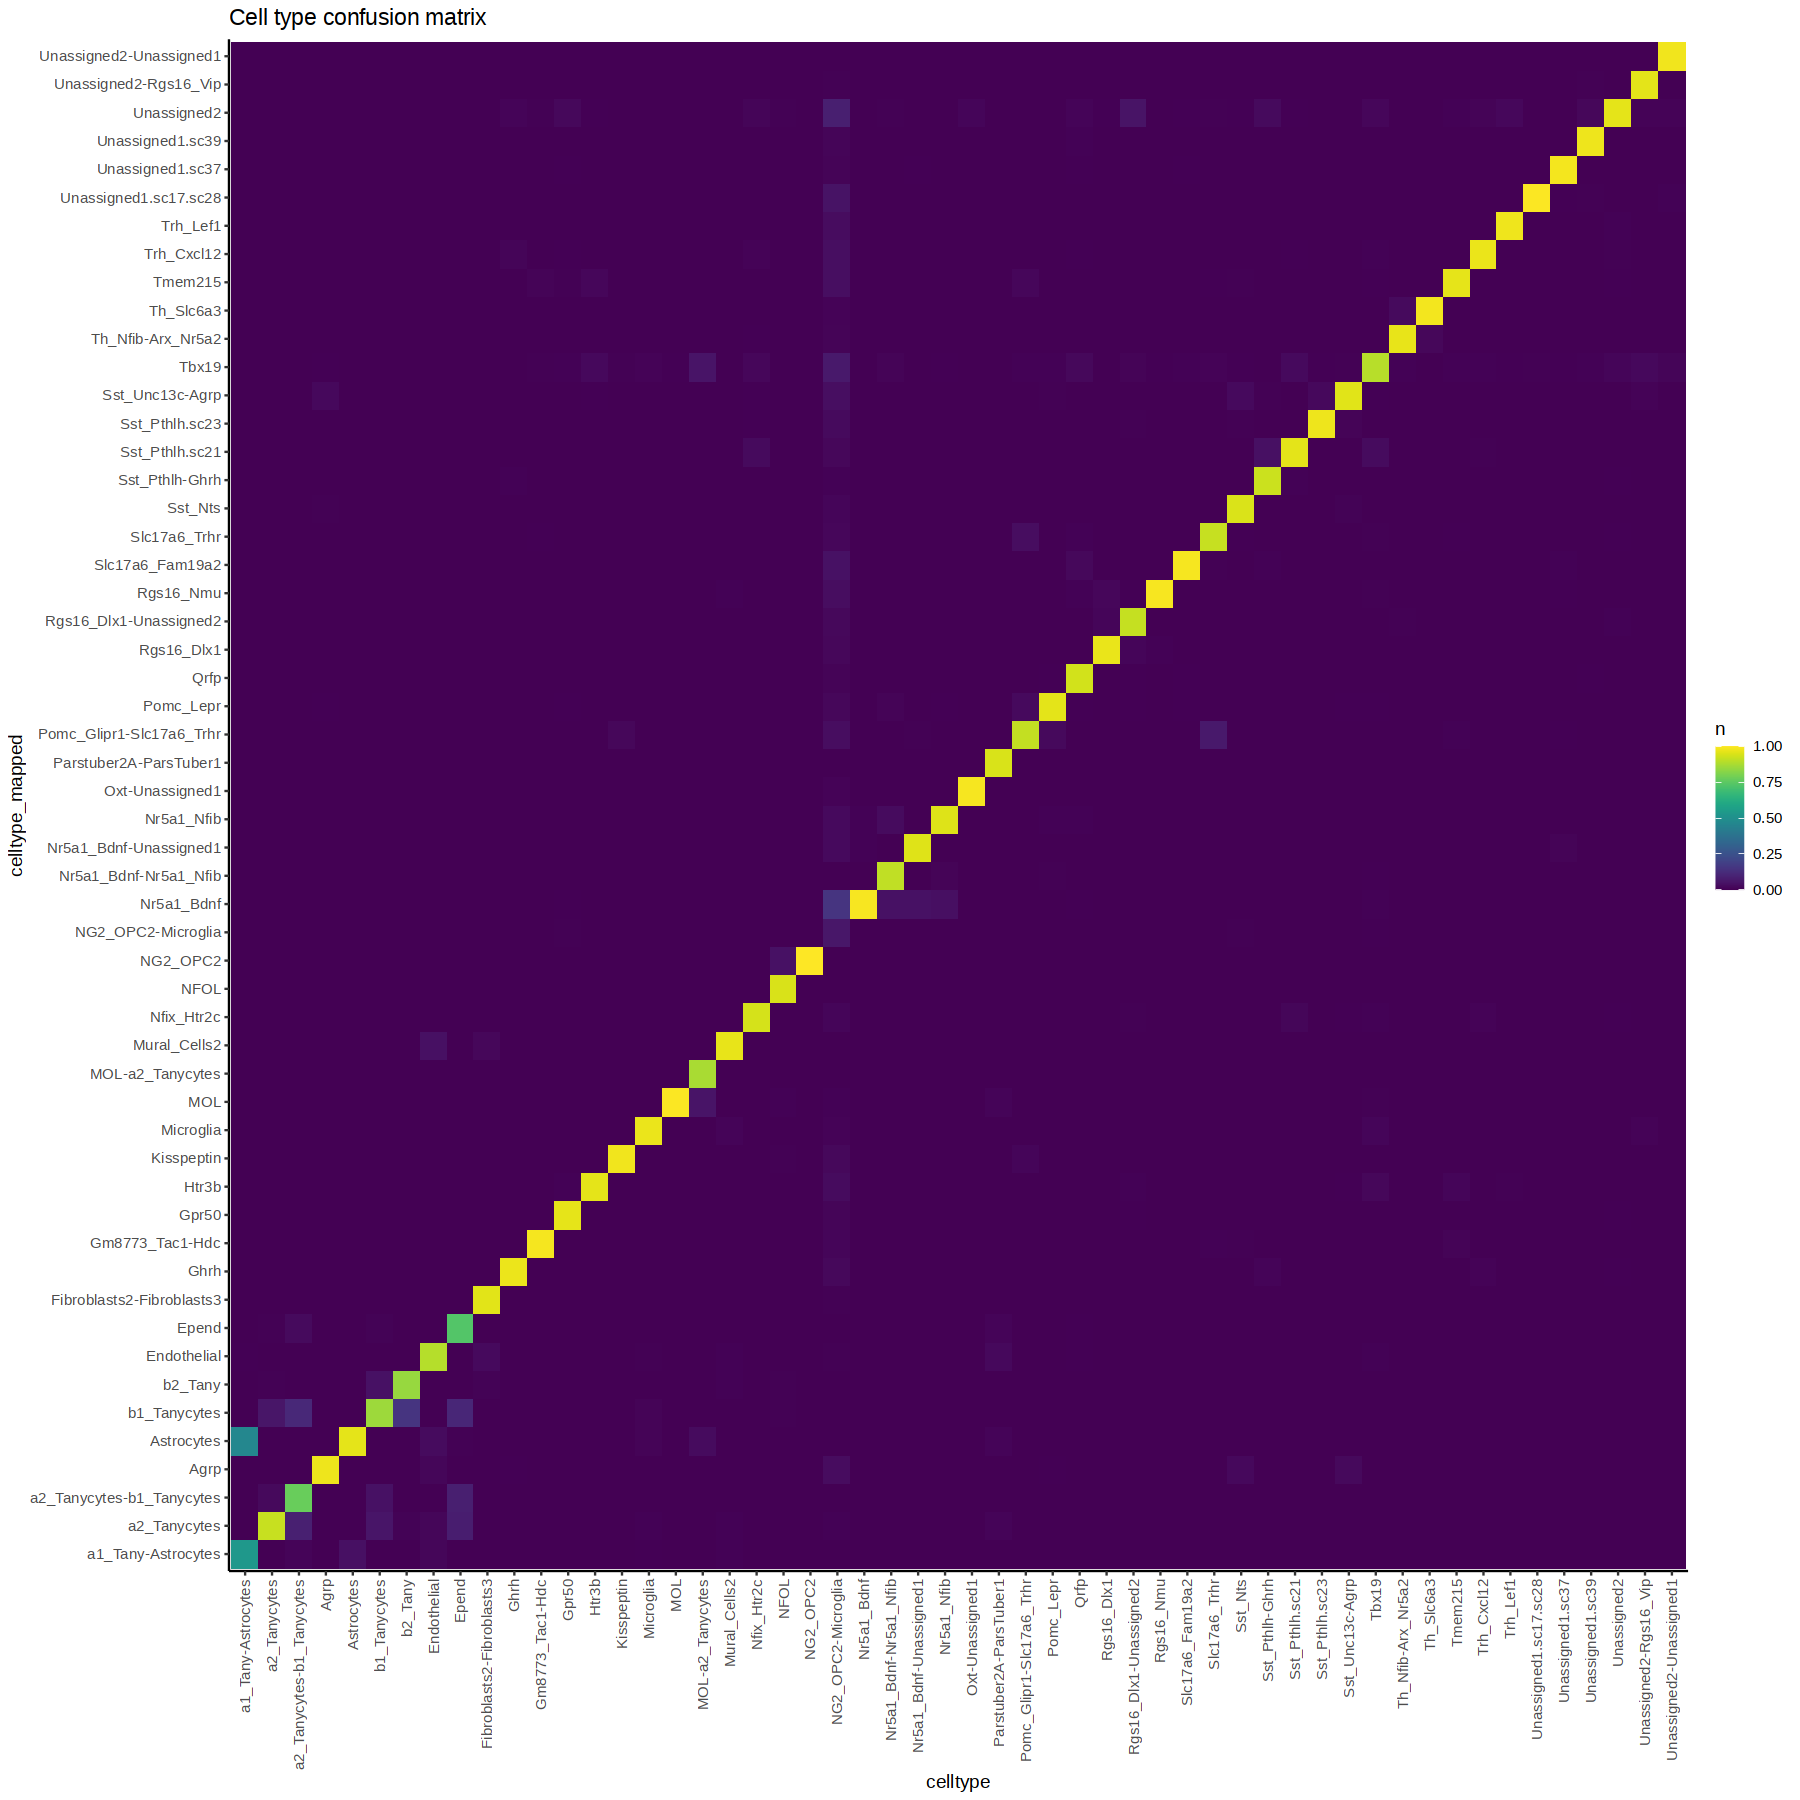

In [40]:
options(repr.plot.width=15, repr.plot.height=15)
p = plot_mapping_heatmap(celltype_mapping_labels$mapping, title = "Cell type confusion matrix", levels=levels_labels)
p

In [41]:
spapros_100 = read_csv('../01_spapros/run_spapros_100/probeset.csv')
head(spapros_100)

New names:
• `` -> `...1`
Rows: 5000 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): ...1, celltypes_DE_1vsall, celltypes_DE_specific, celltypes_DE, cel...
dbl (6): gene_nr, rank, marker_rank, tree_rank, importance_score, pca_score
lgl (7): selection, pre_selected, prior_selected, pca_selected, list_only_ct...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1    gene_nr selection rank marker_rank tree_rank importance_score
1 Celf2   1       TRUE      1    1           1         0.9734354       
2 Zfp804b 2       TRUE      1    1           1         0.8653857       
3 Pde4b   3       TRUE      1    1           1         0.8329831       
4 St18    4       TRUE      1    1           1         0.7933305       
5 Col25a1 5       TRUE      1    1           1         0.7289231       
6 Inpp5d  6       TRUE      1    1           1         0.6841844       
  pca_score  pre_selected prior_selected pca_selected
1 0.69801569 FALSE        FALSE           TRUE       
2 0.48620504 FALSE        FALSE           TRUE       
3 1.20924926 FALSE        FALSE           TRUE       
4 0.61721826 FALSE        FALSE           TRUE       
5 1.48867929 FALSE        FALSE           TRUE       
6 0.01668959 FALSE        FALSE          FALSE       
  celltypes_DE_1vsall                            celltypes_DE_specific
1 Sst_Pthlh.sc23.pos,Unassigned2__Rgs16_Vip.none NA                   
2 Sst_Pthlh__Ghrh.none                           NA                   
3 MOL.none,MOL.pos                               NA                   
4 MOL__a2_Tanycytes.none                         NA                   
5 Sst_Pthlh.sc21.none,b2_Tany.none               NA                   
6 Microglia.none                                 NA                   
  celltypes_DE                                  
1 Sst_Pthlh.sc23.pos,Unassigned2__Rgs16_Vip.none
2 Sst_Pthlh__Ghrh.none                          
3 MOL.none,MOL.pos                              
4 MOL__a2_Tanycytes.none                        
5 Sst_Pthlh.sc21.none,b2_Tany.none              
6 Microglia.none                                
  celltypes_marker                               list_only_ct_marker
1 Sst_Pthlh.sc23.pos,Unassigned2__Rgs16_Vip.none FALSE              
2 Sst_Pthlh__Ghrh.none                           FALSE              
3 MOL.none,MOL.pos                               FALSE              
4 MOL__a2_Tanycytes.none                         FALSE              
5 Sst_Pthlh.sc21.none,b2_Tany.none               FALSE              
6 Microglia.none                                 FALSE              
  required_marker required_list_marker
1 TRUE            FALSE               
2 TRUE            FALSE               
3 TRUE            FALSE               
4 TRUE            FALSE               
5 TRUE            FALSE               
6 TRUE            FALSE

In [46]:
selected_genes_sp100 = spapros_100 %>% filter(selection == TRUE) %>% pull(var=1)

In [47]:
celltype_mapping_sp100 = get_celltype_mapping(sce , genes.selection = selected_genes_sp100, celltype.id = 'polar_label', return.stat = TRUE)

ERROR: Error in .check_genes_in_sce(sce, genes.selection): Some gene names are missing from SCE.


In [55]:
sce_genes = sce@assays@data$logcounts %>% rownames

In [57]:
sce_genes %>% intersect(selected_genes_sp100) %>% length

[1] 96

In [58]:
selected_genes_sp96 = selected_genes_sp100 %>% intersect(sce_genes)

In [59]:
celltype_mapping_sp96 = get_celltype_mapping(sce , genes.selection = selected_genes_sp96, celltype.id = 'polar_label', return.stat = TRUE)

In [62]:
levels_sp96 = celltype_mapping_sp96$mapping %>% pull(celltype) %>% unique() %>% enframe %>% arrange(value) %>% pull(value)

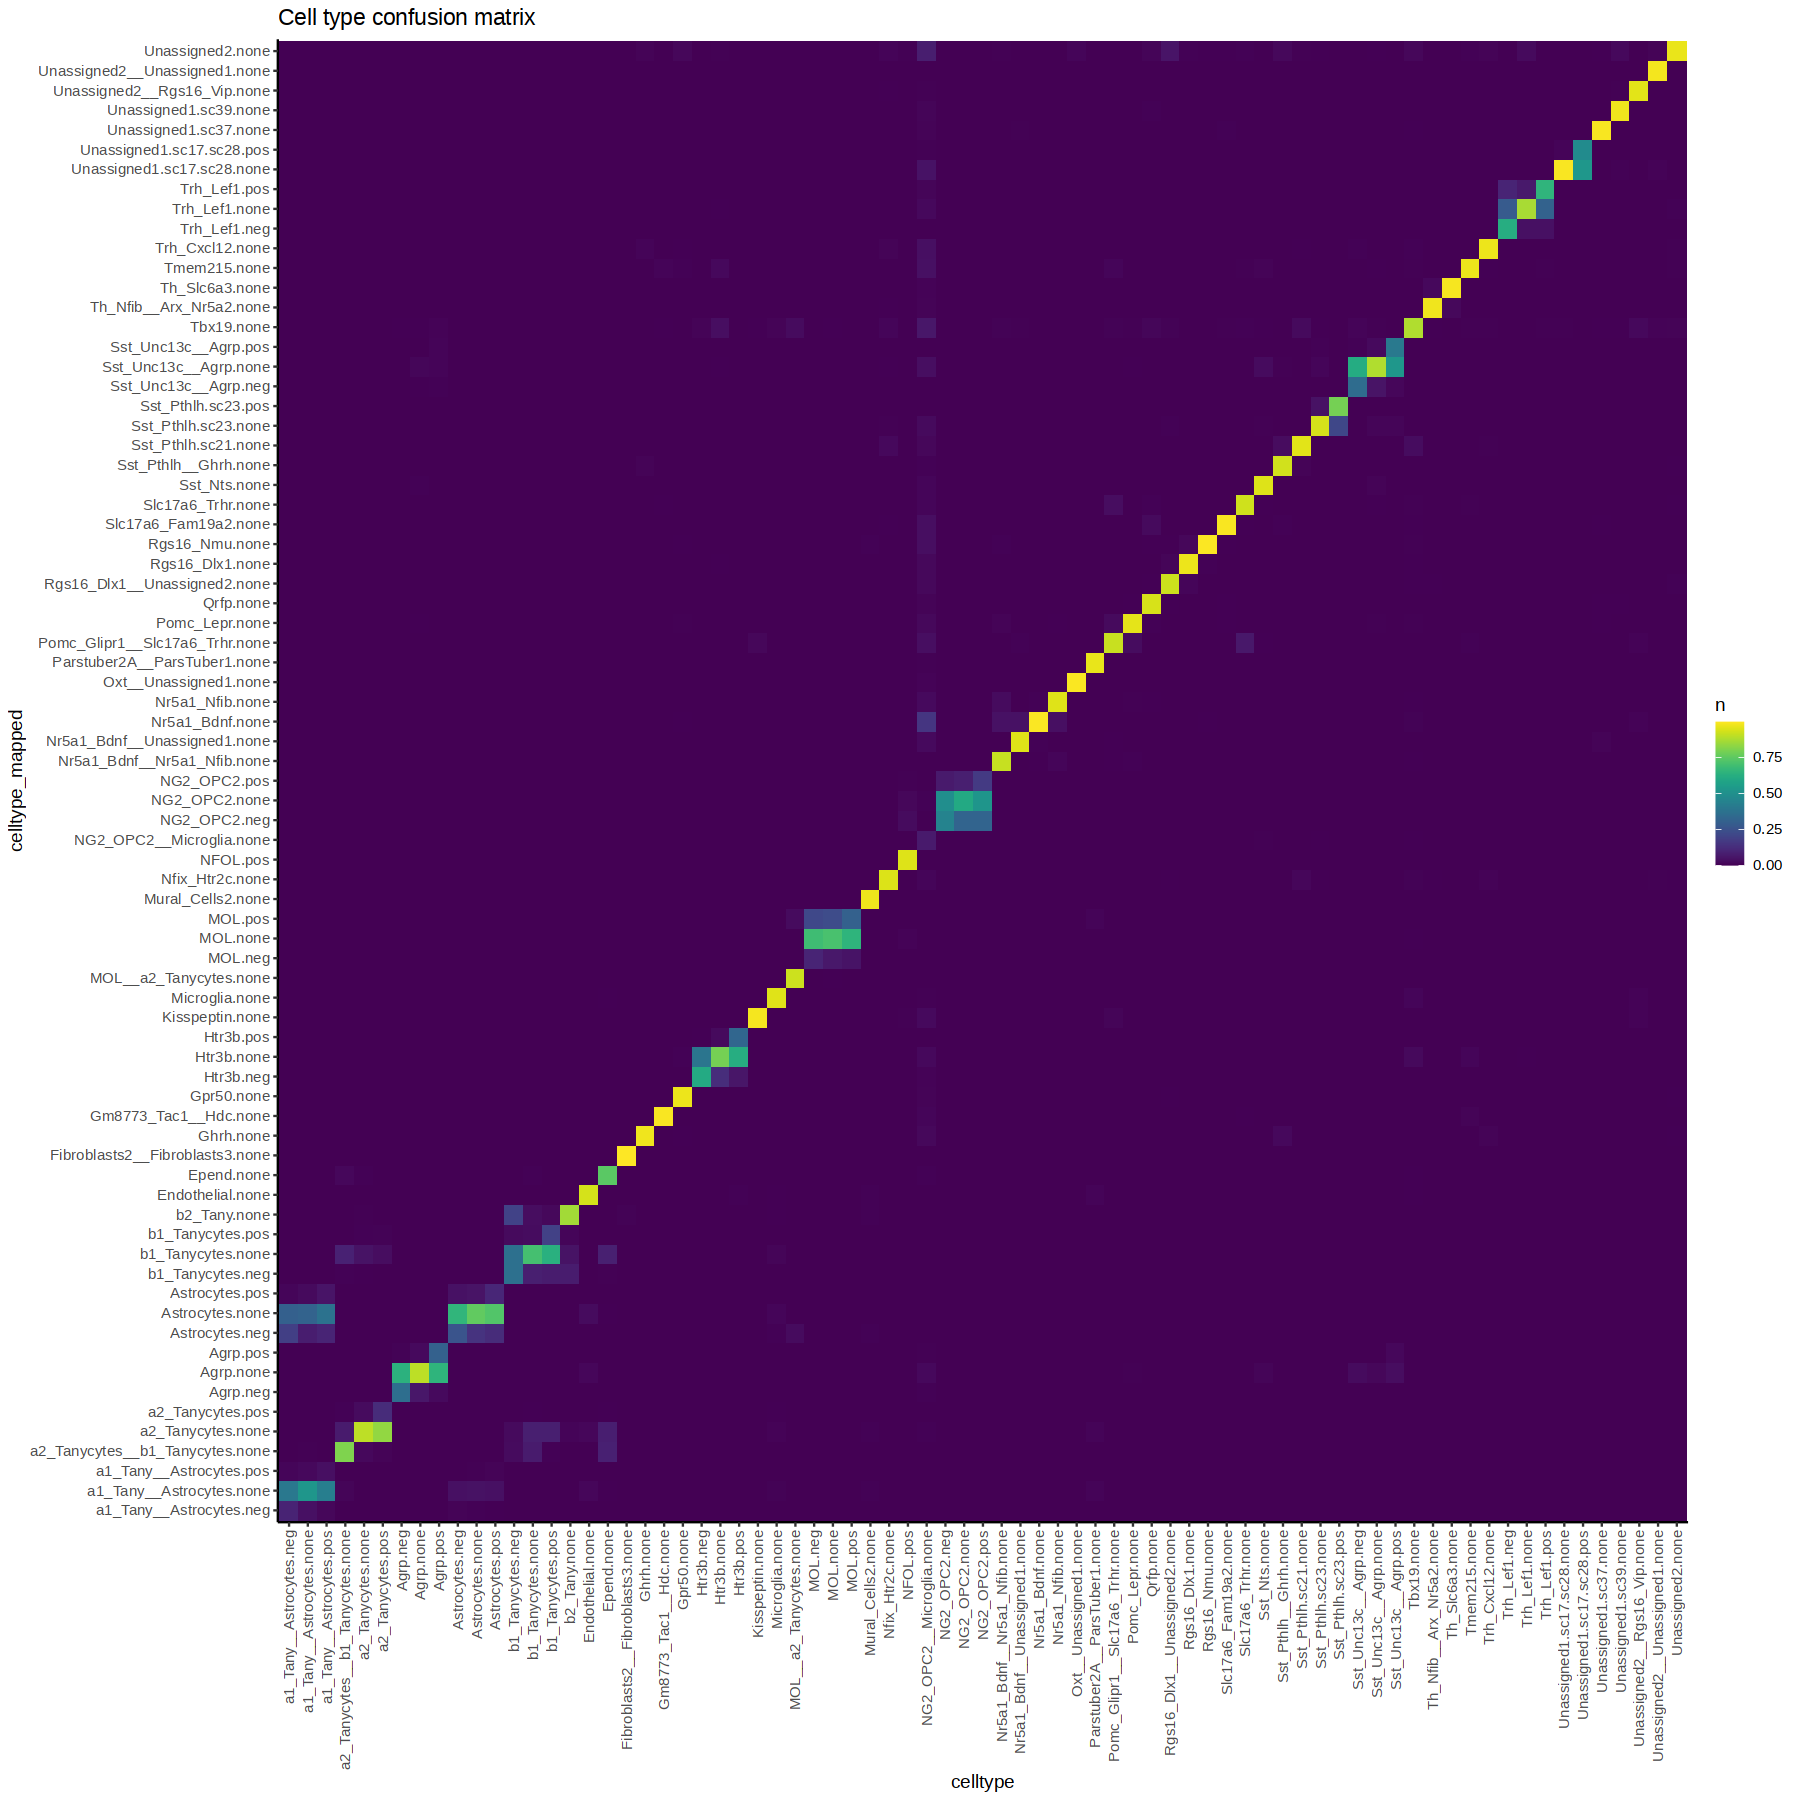

In [63]:
options(repr.plot.width=15, repr.plot.height=15)
p = plot_mapping_heatmap(celltype_mapping_sp96$mapping, title = "Cell type confusion matrix", levels=levels_sp96)
p

In [66]:
sg10 = selected_genes$gene %>% head(10)
sg20 = selected_genes$gene %>% head(20)
sg30 = selected_genes$gene %>% head(30)
sg40 = selected_genes$gene %>% head(40)
sg50 = selected_genes$gene %>% head(50)
sg60 = selected_genes$gene %>% head(60)
sg70 = selected_genes$gene %>% head(70)
sg80 = selected_genes$gene %>% head(80)
sg90 = selected_genes$gene %>% head(90)

In [67]:
celltype_mapping_gbr10 = get_celltype_mapping(sce , genes.selection = sg10, celltype.id = 'polar_label', return.stat = T)

In [68]:
celltype_mapping_gbr20 = get_celltype_mapping(sce , genes.selection = sg20, celltype.id = 'polar_label', return.stat = T)

In [ ]:
celltype_mapping_gbr30 = get_celltype_mapping(sce , genes.selection = sg30, celltype.id = 'polar_label', return.stat = T)

In [ ]:
celltype_mapping_gbr40 = get_celltype_mapping(sce , genes.selection = sg40, celltype.id = 'polar_label', return.stat = T)

In [ ]:
celltype_mapping_gbr50 = get_celltype_mapping(sce , genes.selection = sg50, celltype.id = 'polar_label', return.stat = T)

In [ ]:
celltype_mapping_gbr60 = get_celltype_mapping(sce , genes.selection = sg60, celltype.id = 'polar_label', return.stat = T)

In [ ]:
celltype_mapping_gbr70 = get_celltype_mapping(sce , genes.selection = sg70, celltype.id = 'polar_label', return.stat = T)

In [ ]:
celltype_mapping_gbr80 = get_celltype_mapping(sce , genes.selection = sg80, celltype.id = 'polar_label', return.stat = T)

In [ ]:
celltype_mapping_gbr90 = get_celltype_mapping(sce , genes.selection = sg90, celltype.id = 'polar_label', return.stat = T)

In [76]:
2

[1] 2

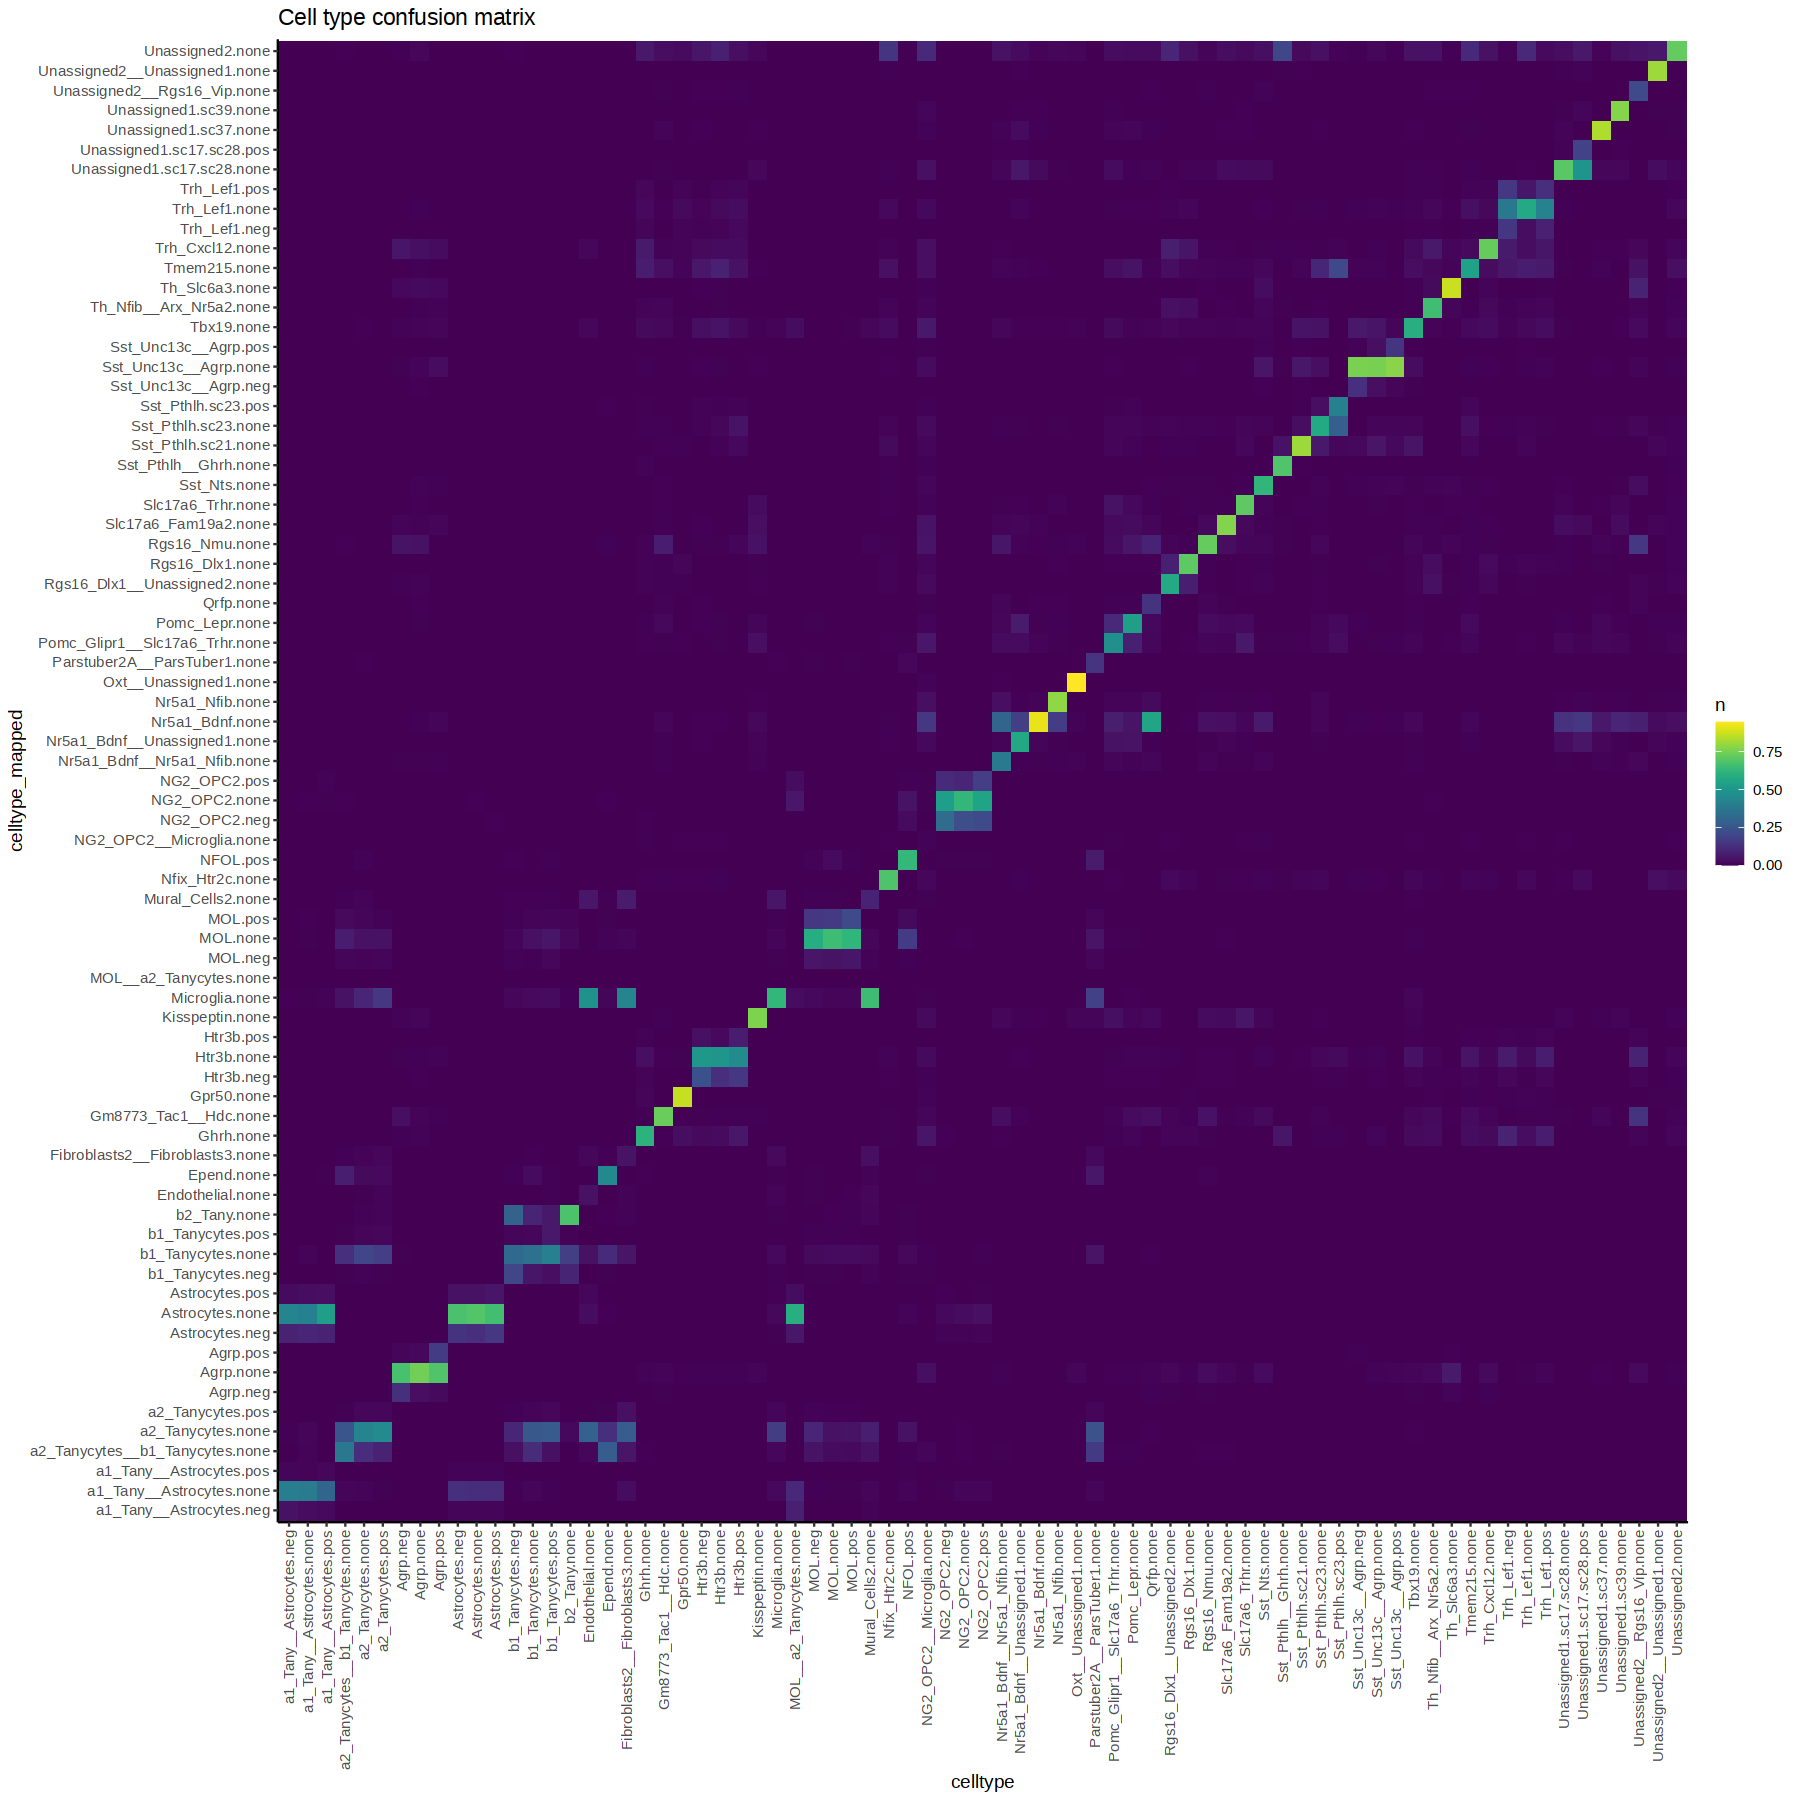

In [77]:
options(repr.plot.width=15, repr.plot.height=15)
p = plot_mapping_heatmap(celltype_mapping_gbr10$mapping, title = "Cell type confusion matrix", levels=levels)
p

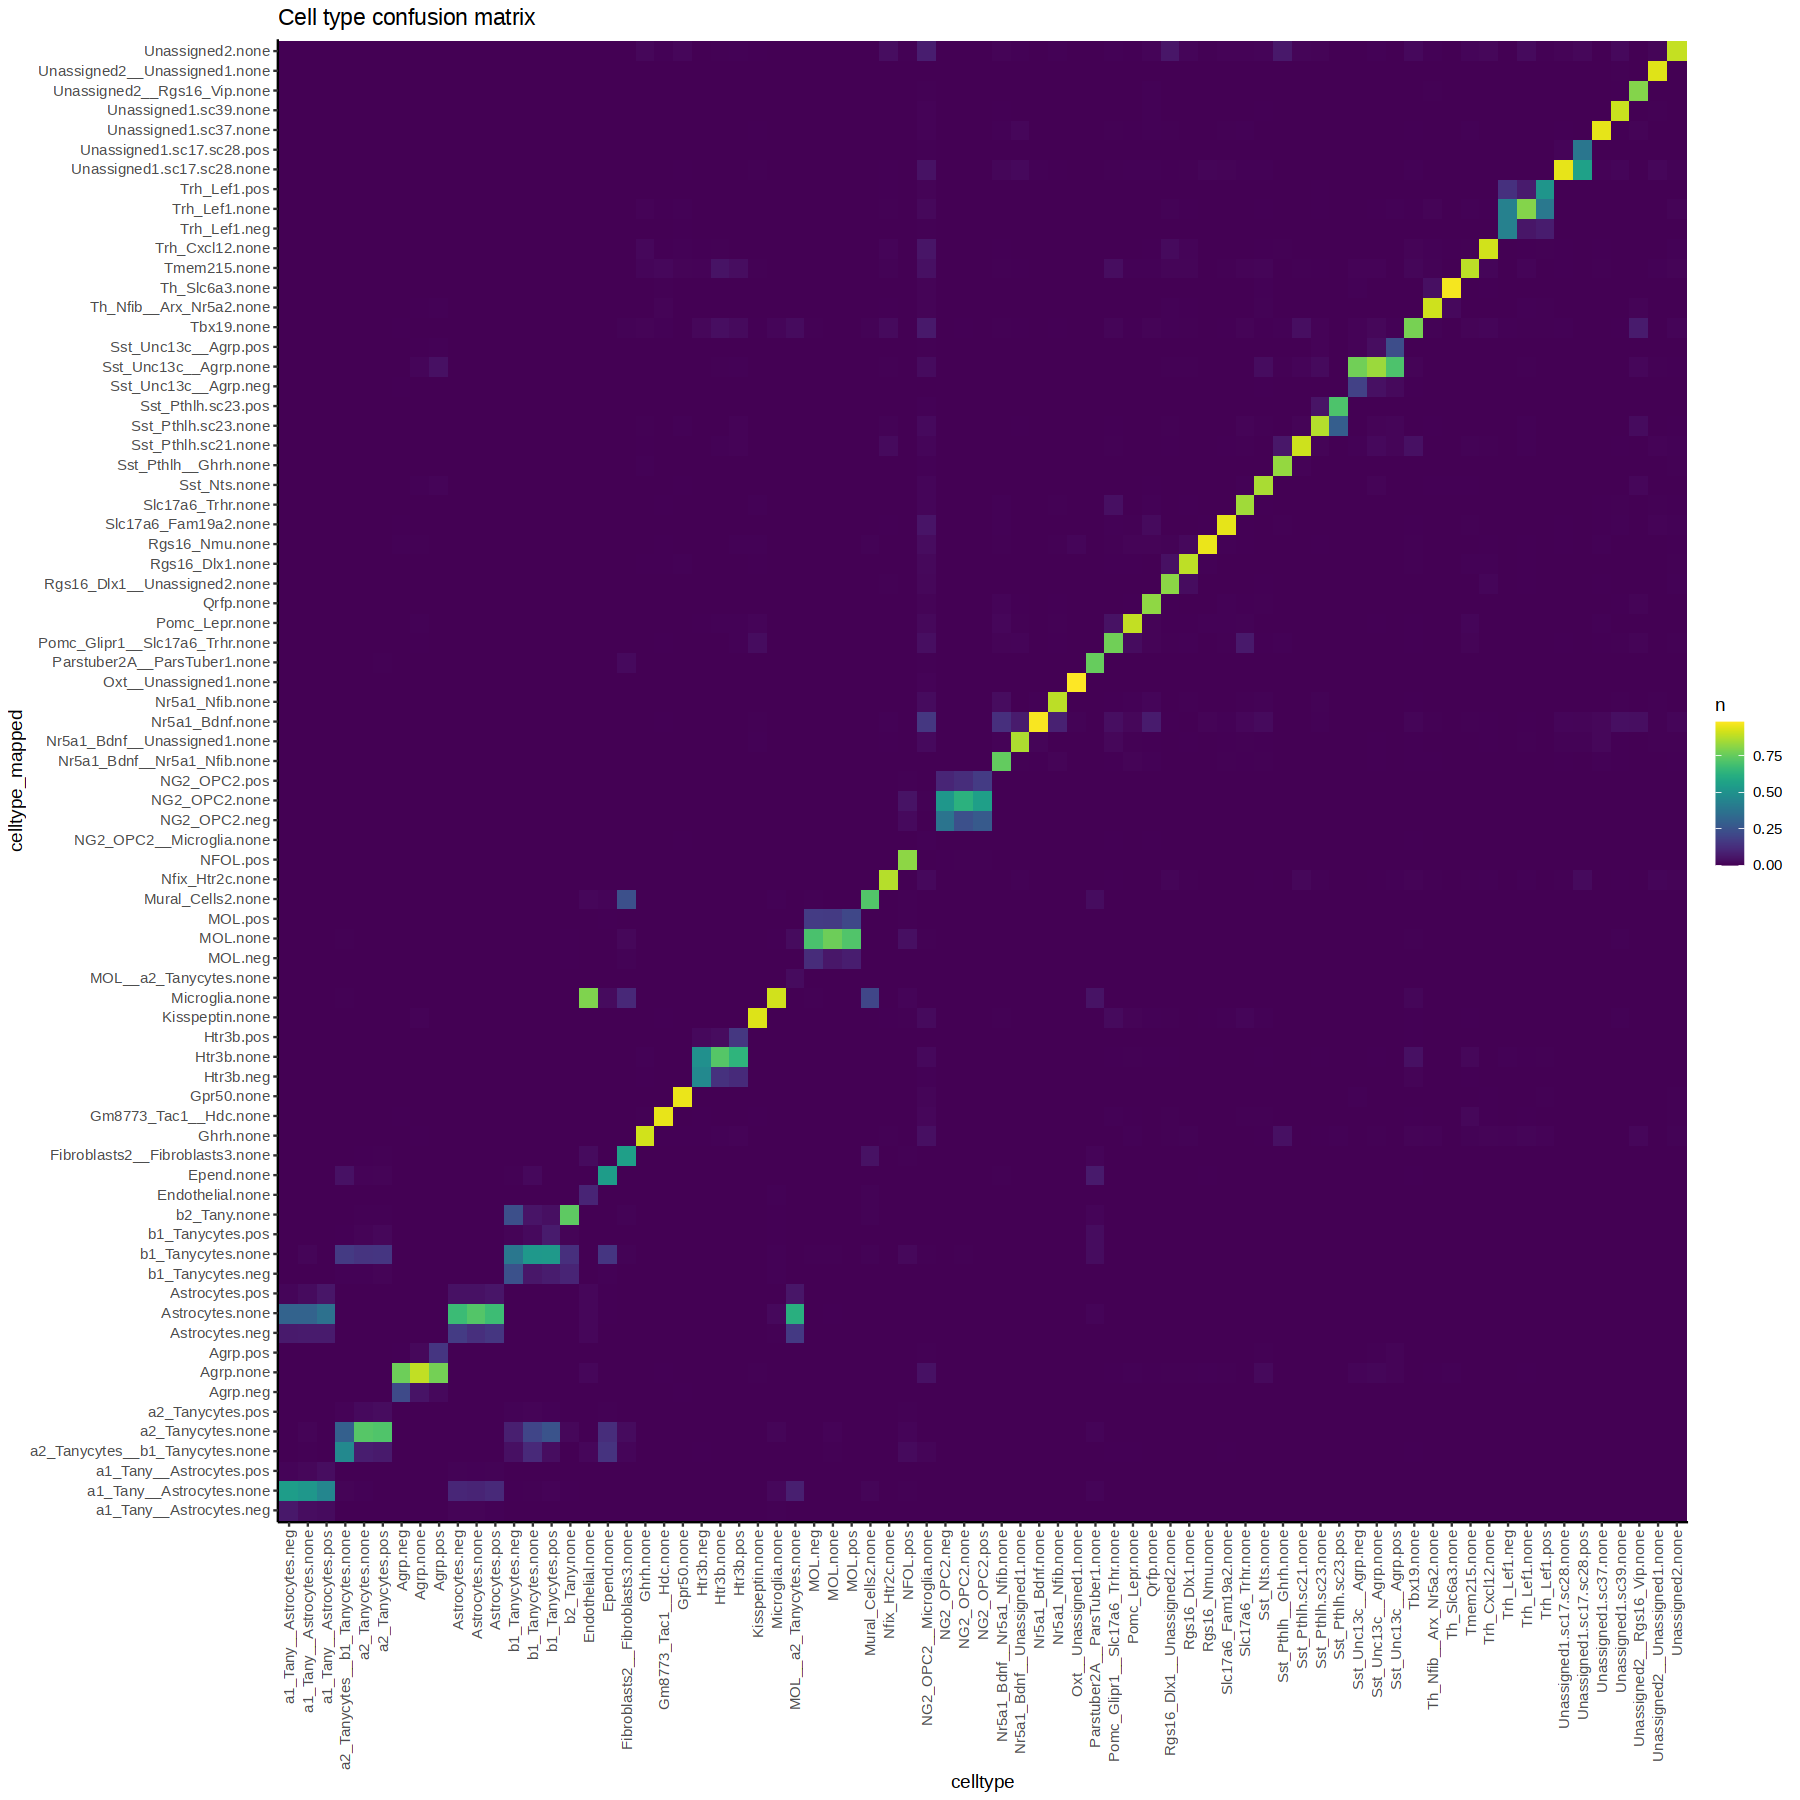

In [78]:
options(repr.plot.width=15, repr.plot.height=15)
p = plot_mapping_heatmap(celltype_mapping_gbr20$mapping, title = "Cell type confusion matrix", levels=levels)
p

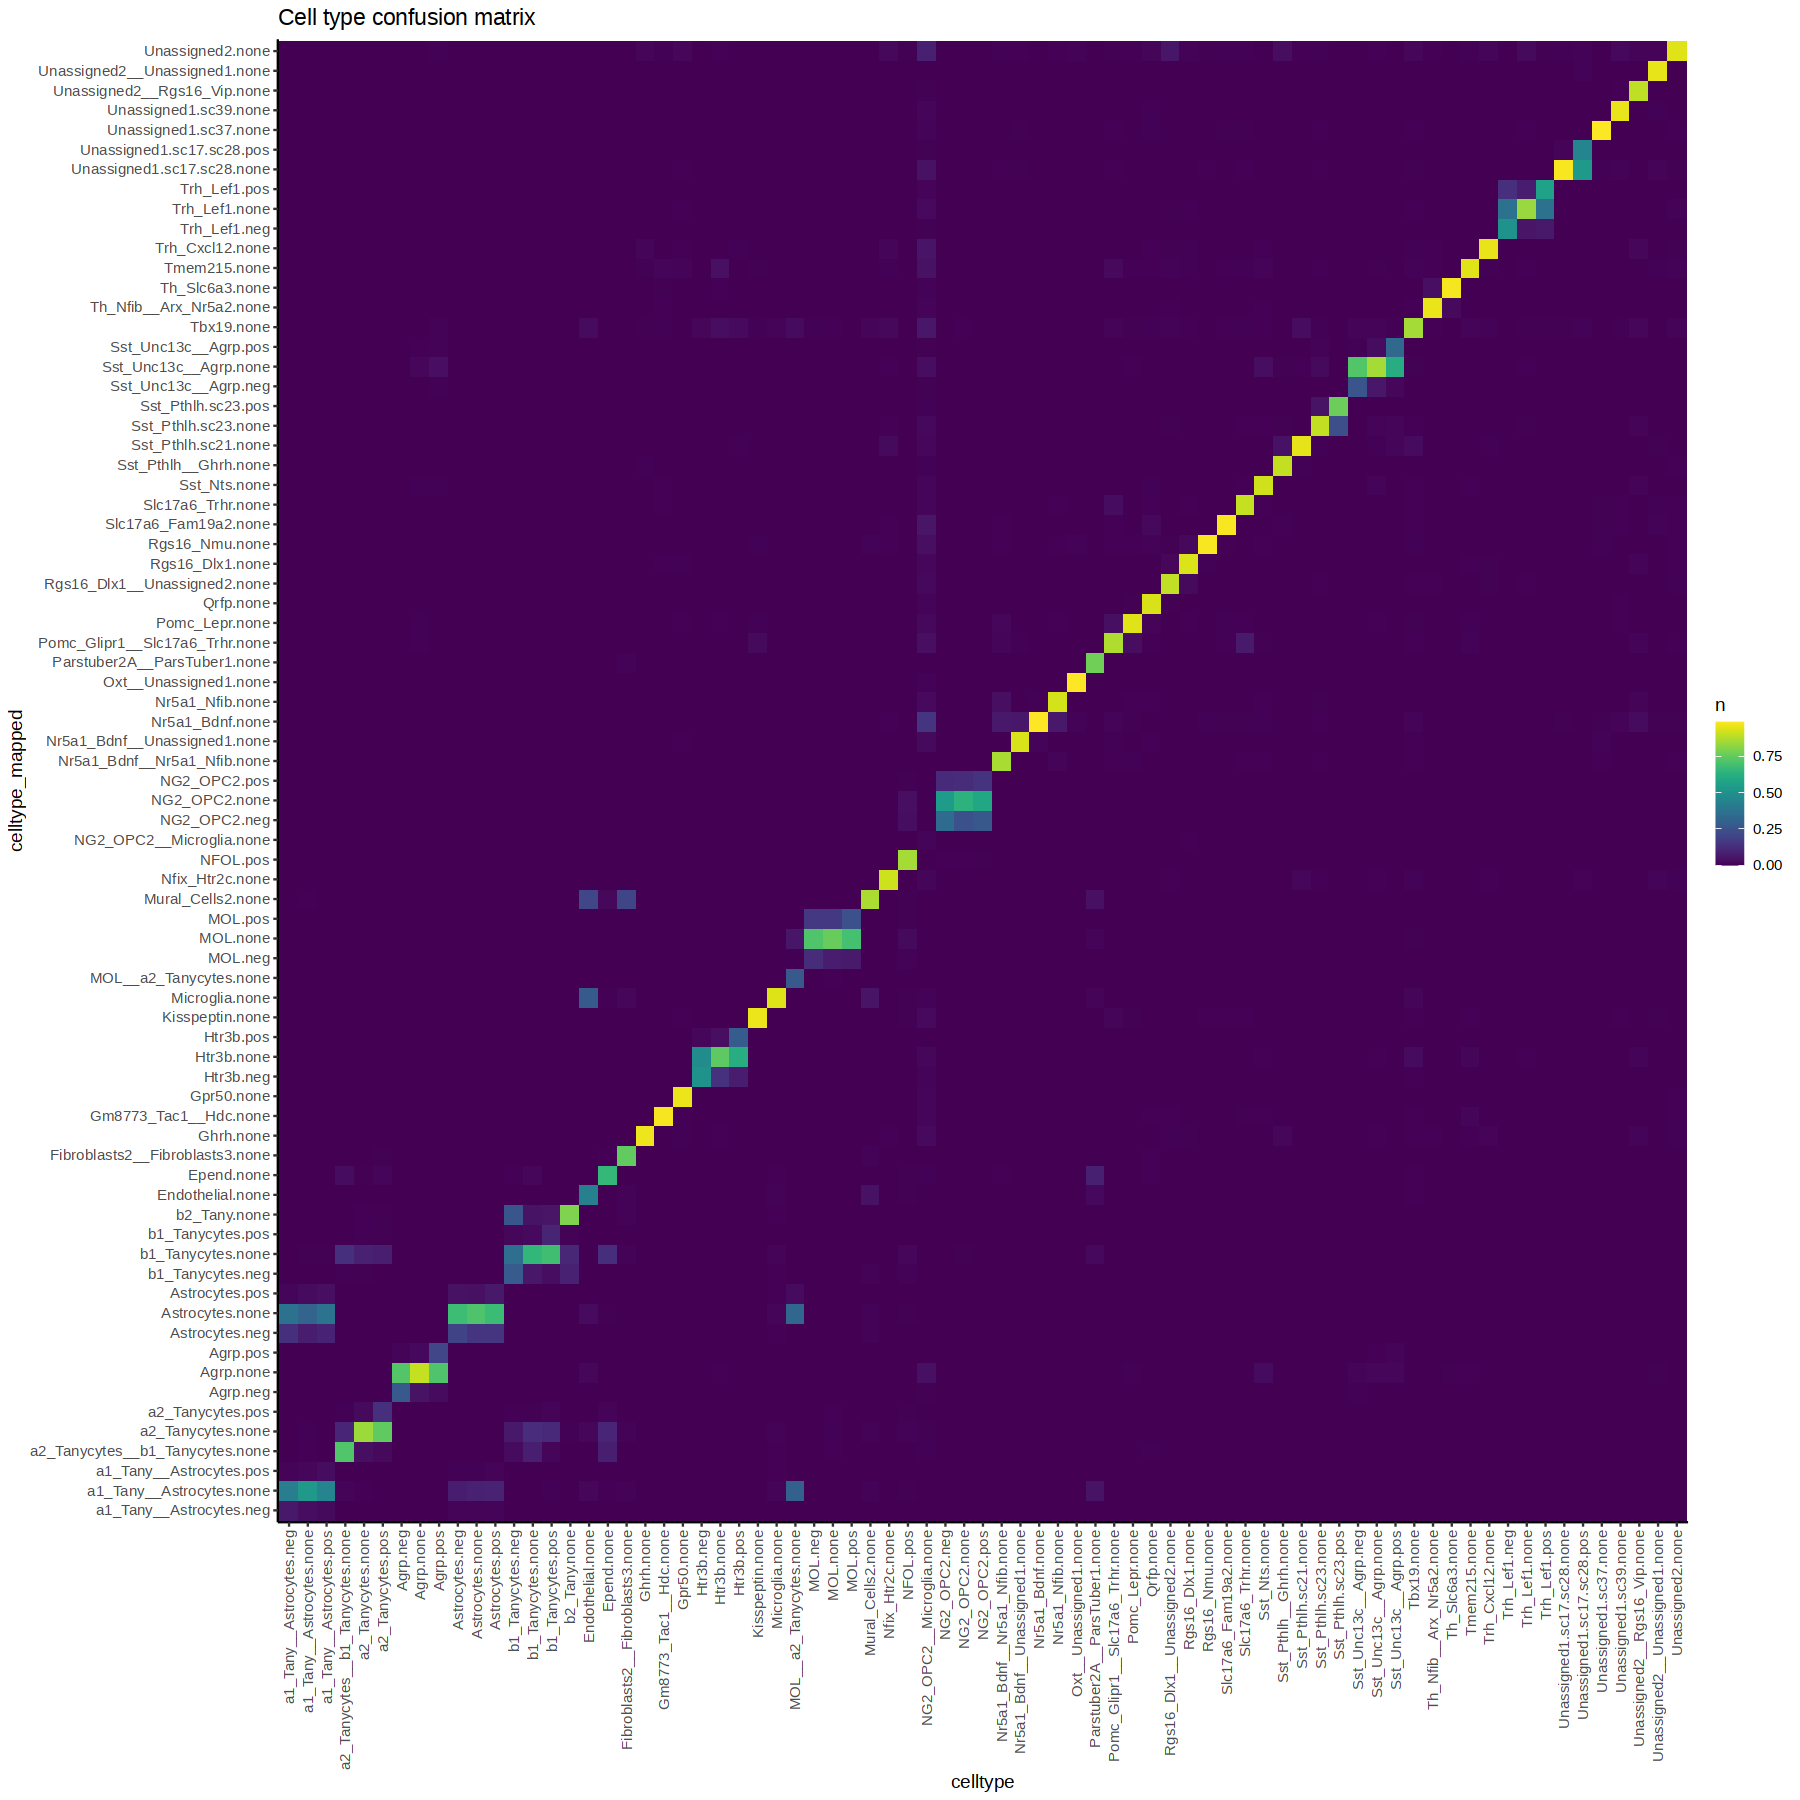

In [81]:
options(repr.plot.width=15, repr.plot.height=15)
p = plot_mapping_heatmap(celltype_mapping_gbr30$mapping, title = "Cell type confusion matrix", levels=levels)
p

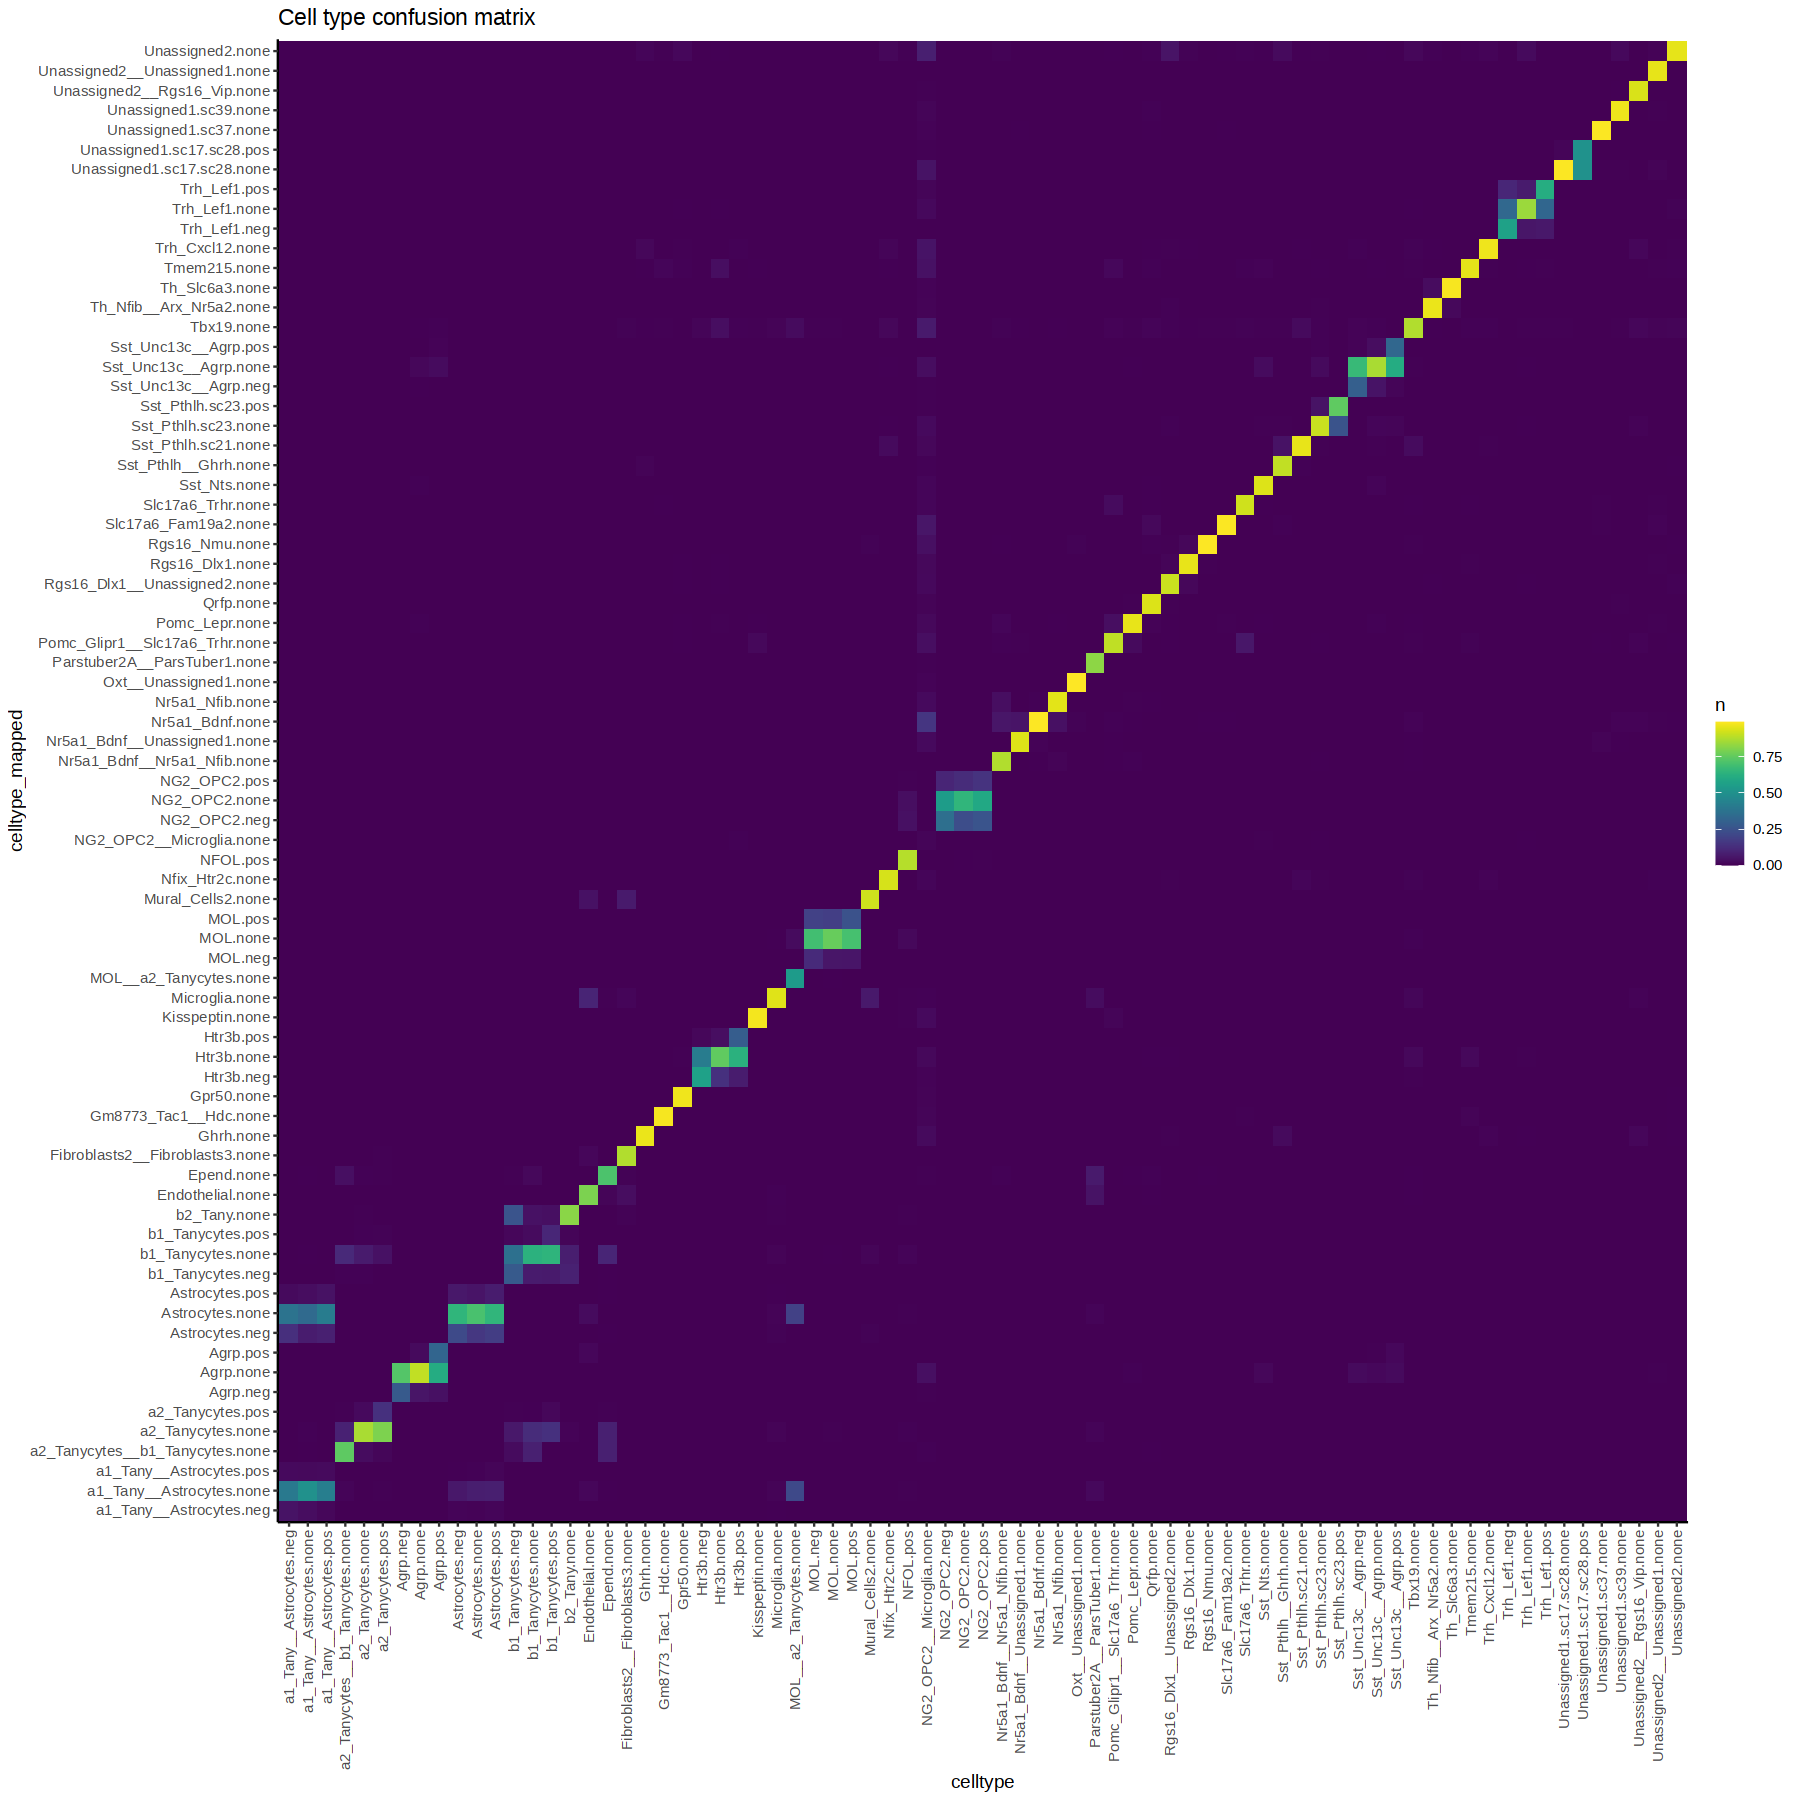

In [82]:
options(repr.plot.width=15, repr.plot.height=15)
p = plot_mapping_heatmap(celltype_mapping_gbr40$mapping, title = "Cell type confusion matrix", levels=levels)
p

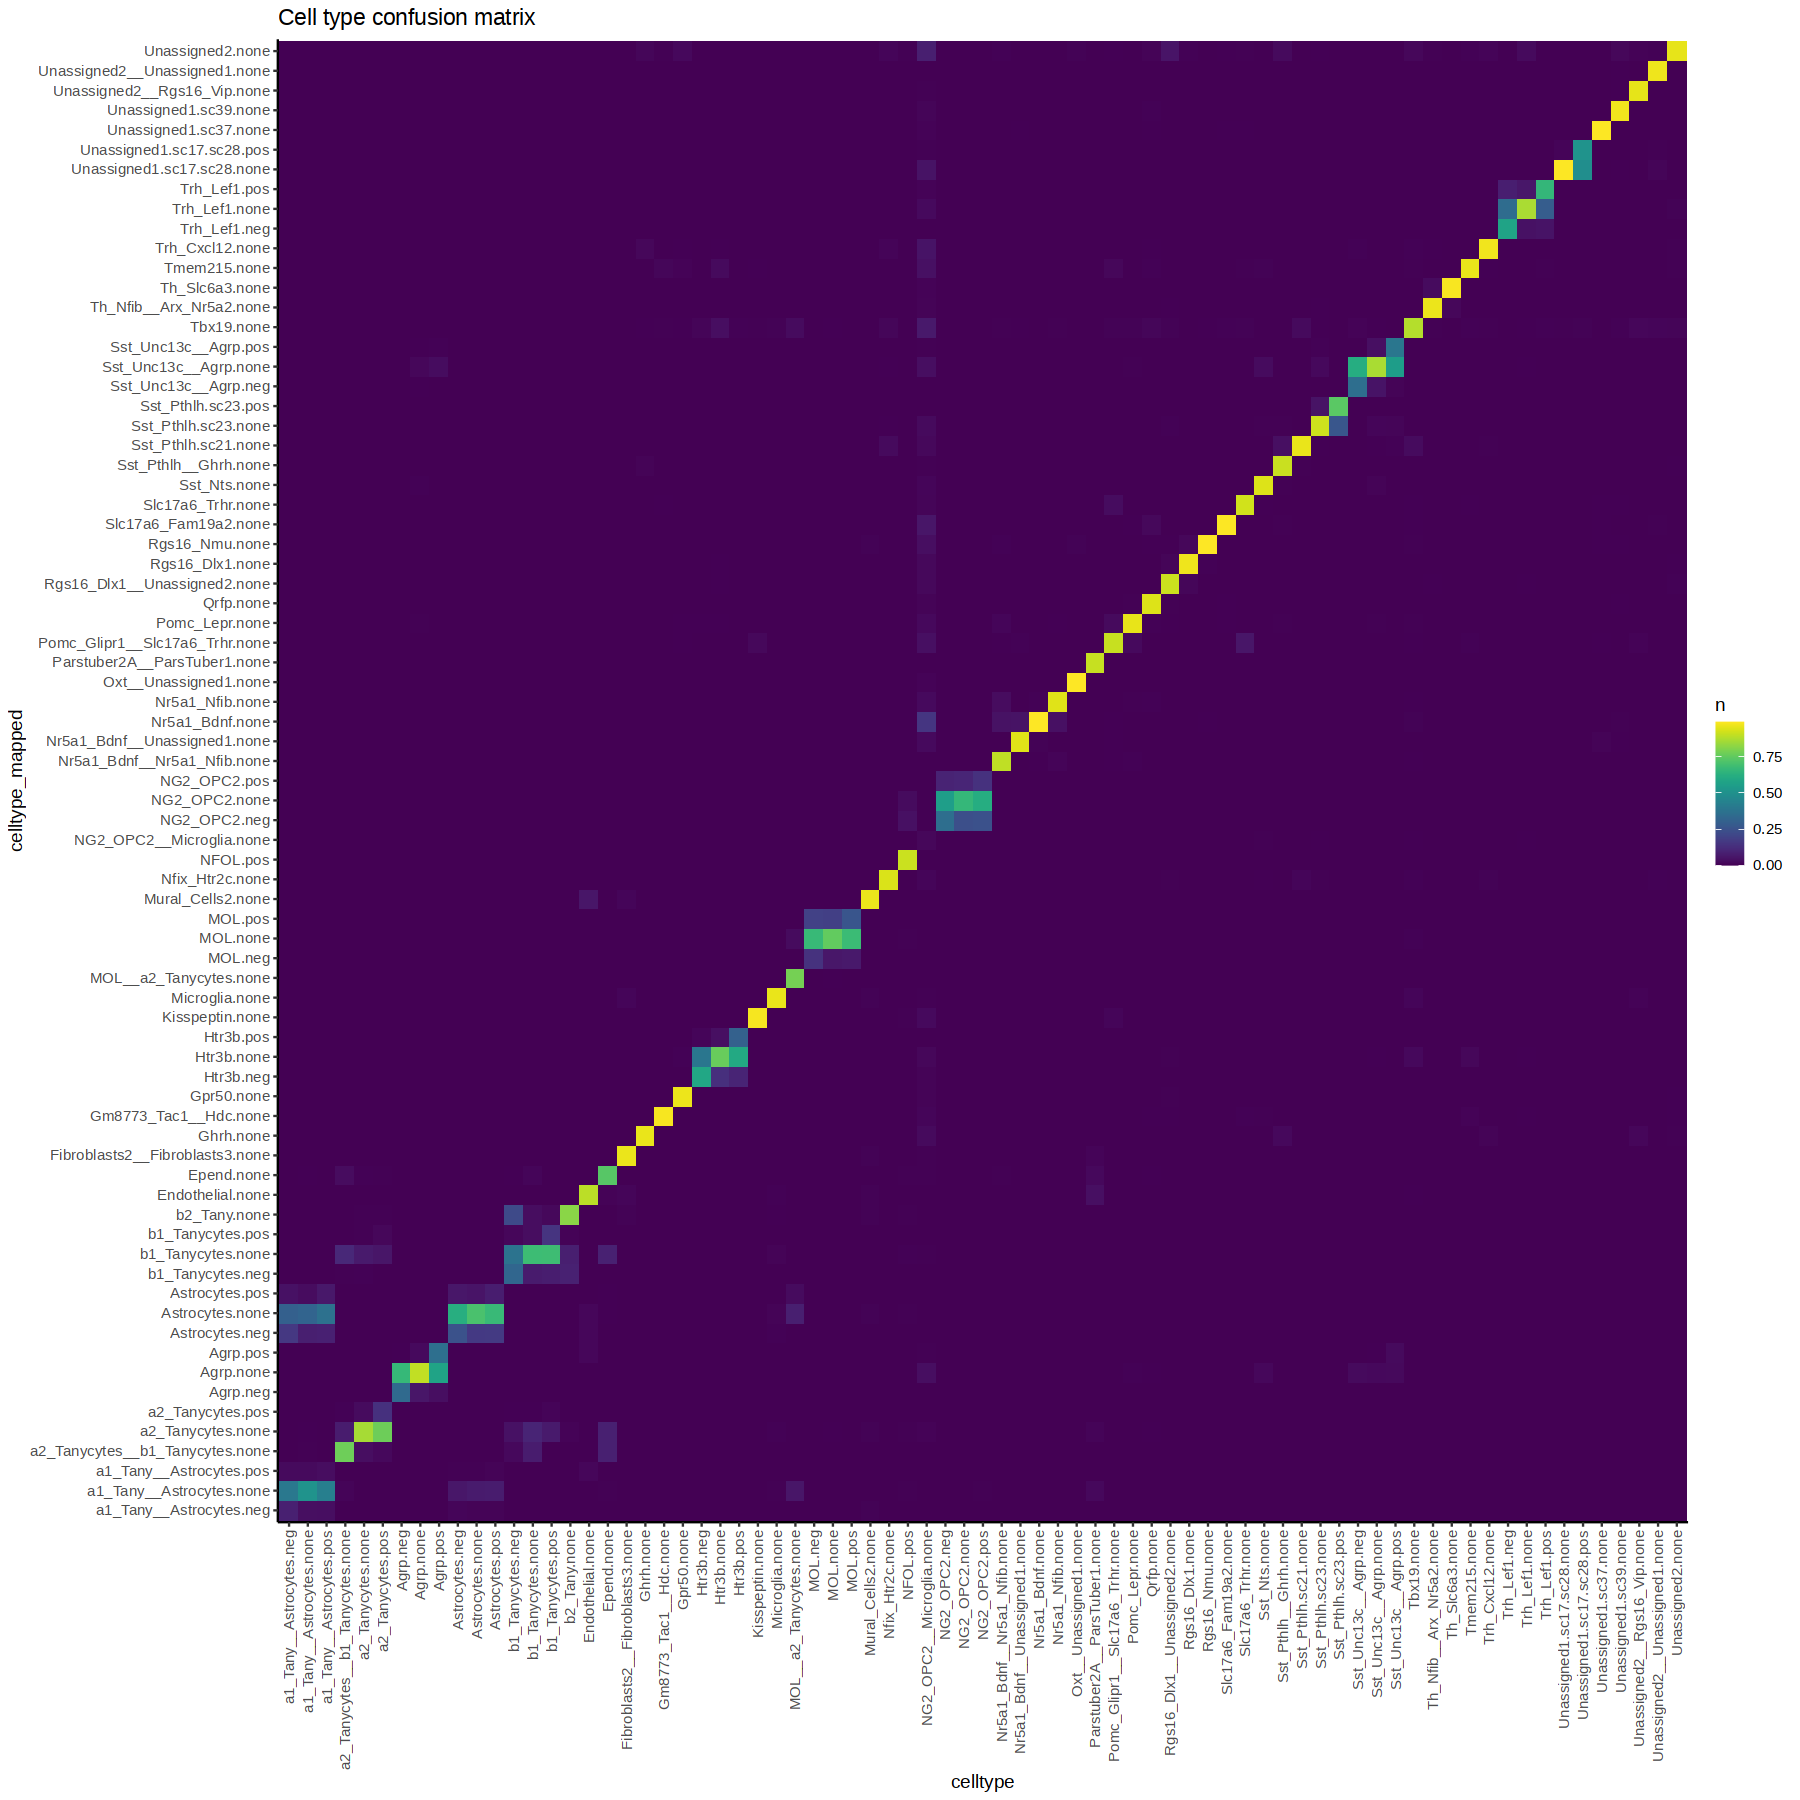

In [83]:
options(repr.plot.width=15, repr.plot.height=15)
p = plot_mapping_heatmap(celltype_mapping_gbr50$mapping, title = "Cell type confusion matrix", levels=levels)
p

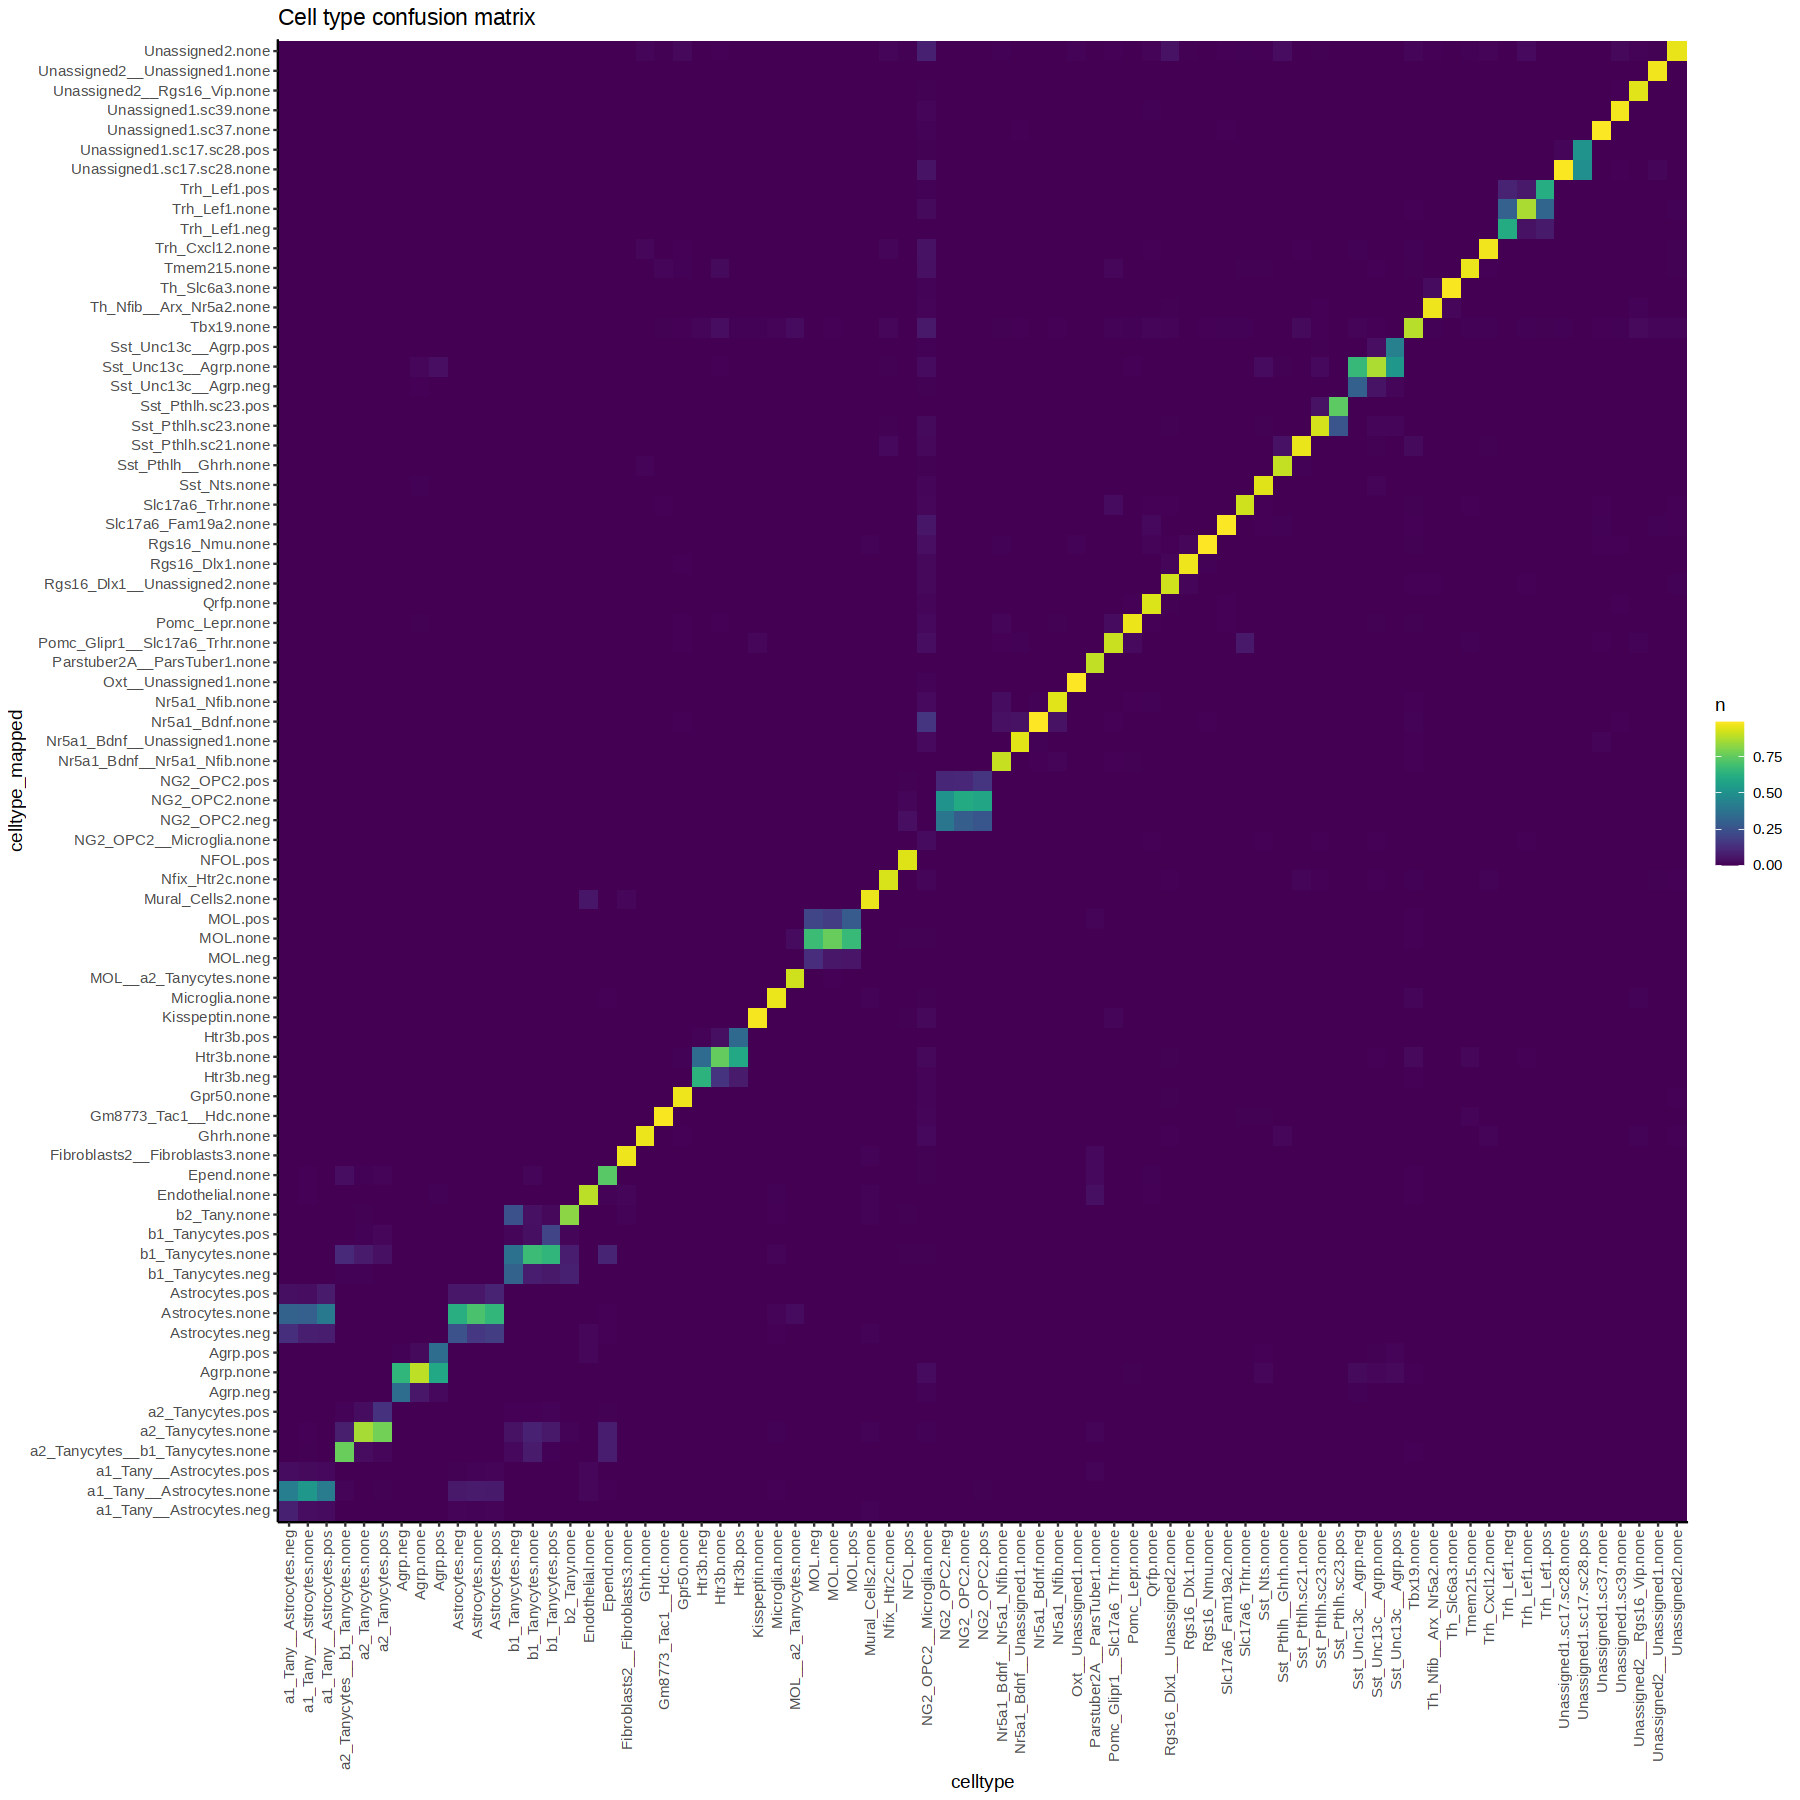

In [84]:
options(repr.plot.width=15, repr.plot.height=15)
p = plot_mapping_heatmap(celltype_mapping_gbr60$mapping, title = "Cell type confusion matrix", levels=levels)
p

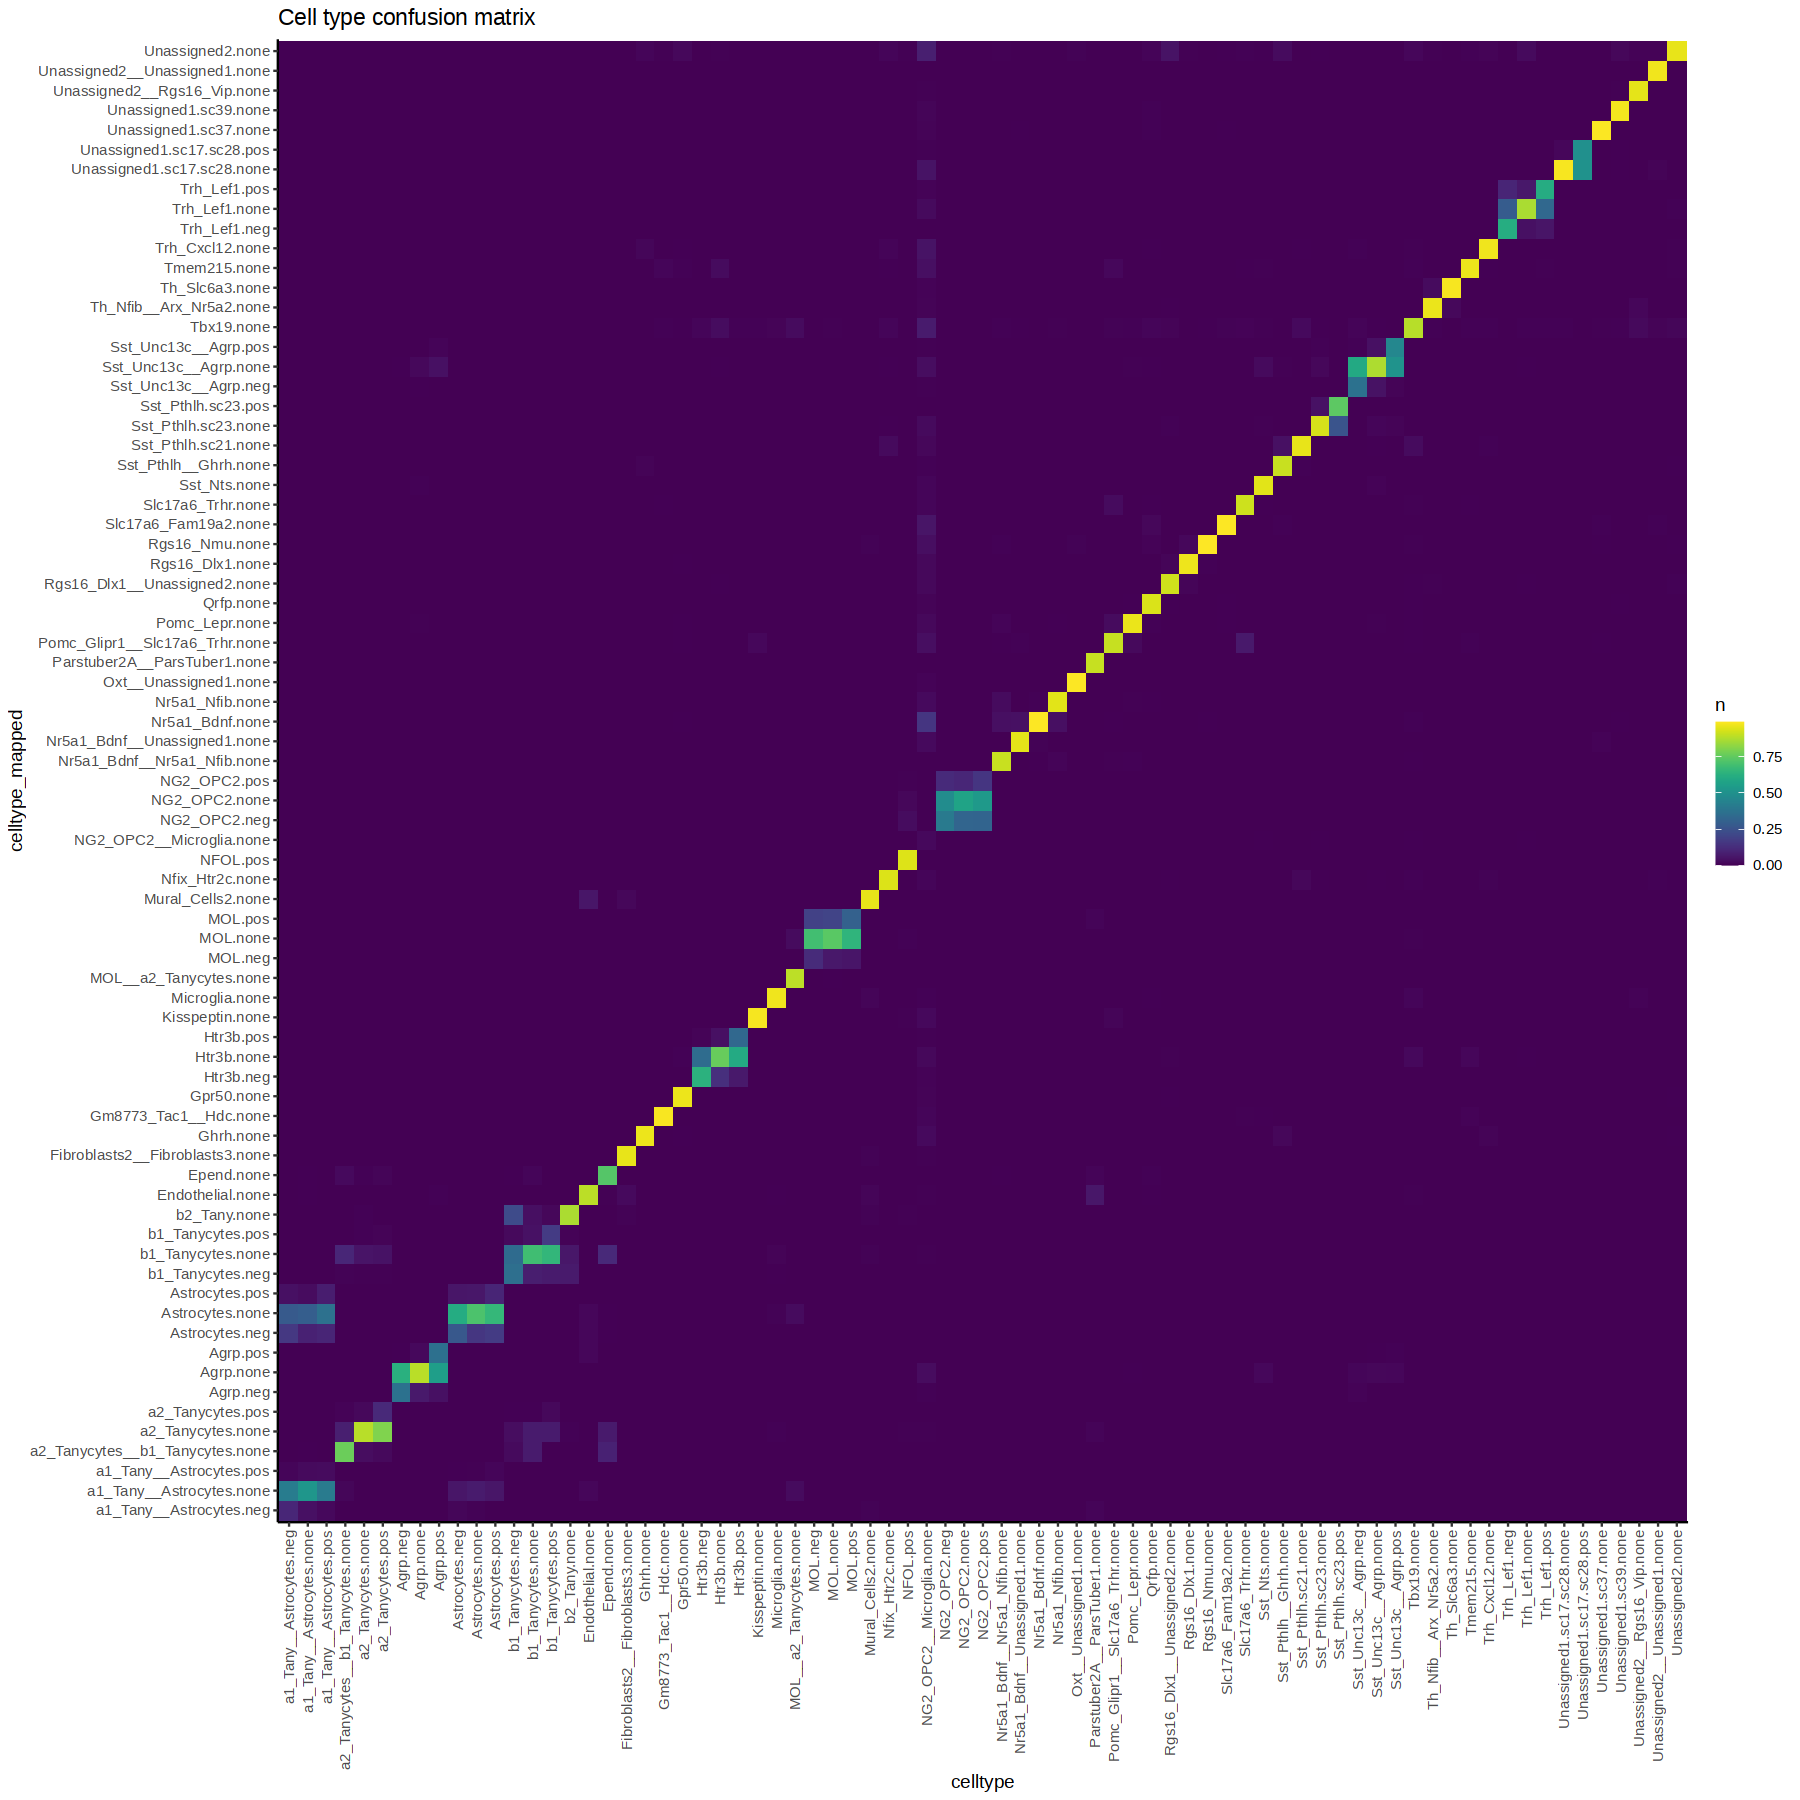

In [85]:
options(repr.plot.width=15, repr.plot.height=15)
p = plot_mapping_heatmap(celltype_mapping_gbr70$mapping, title = "Cell type confusion matrix", levels=levels)
p

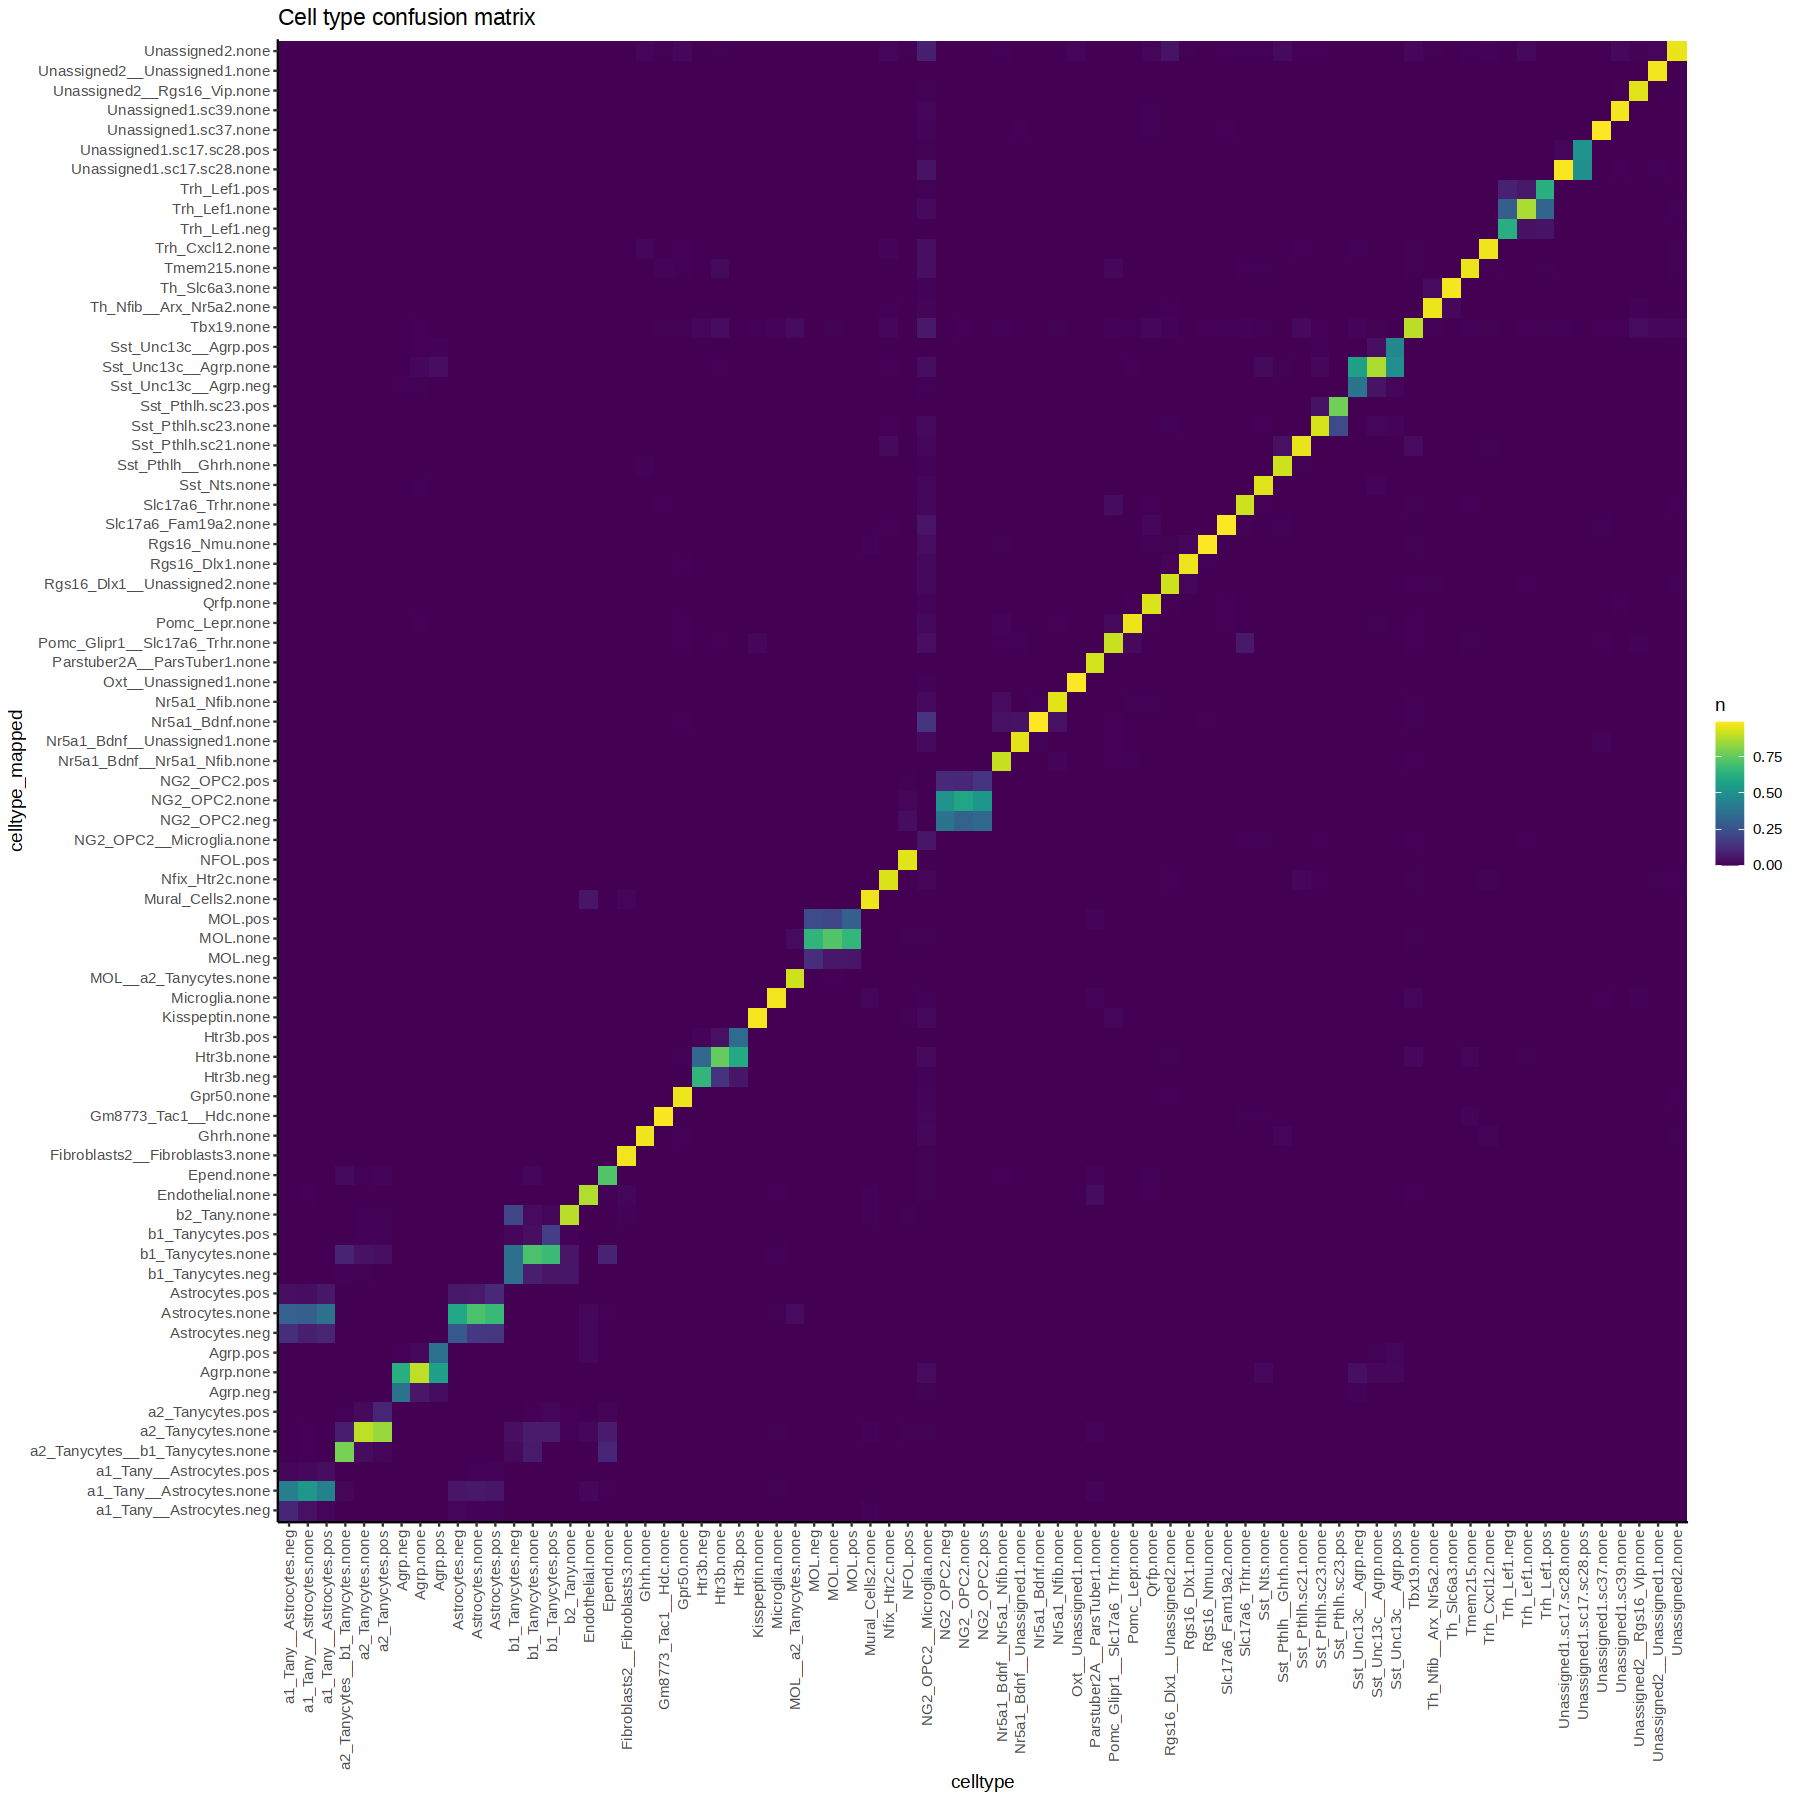

In [86]:
options(repr.plot.width=15, repr.plot.height=15)
p = plot_mapping_heatmap(celltype_mapping_gbr80$mapping, title = "Cell type confusion matrix", levels=levels)
p

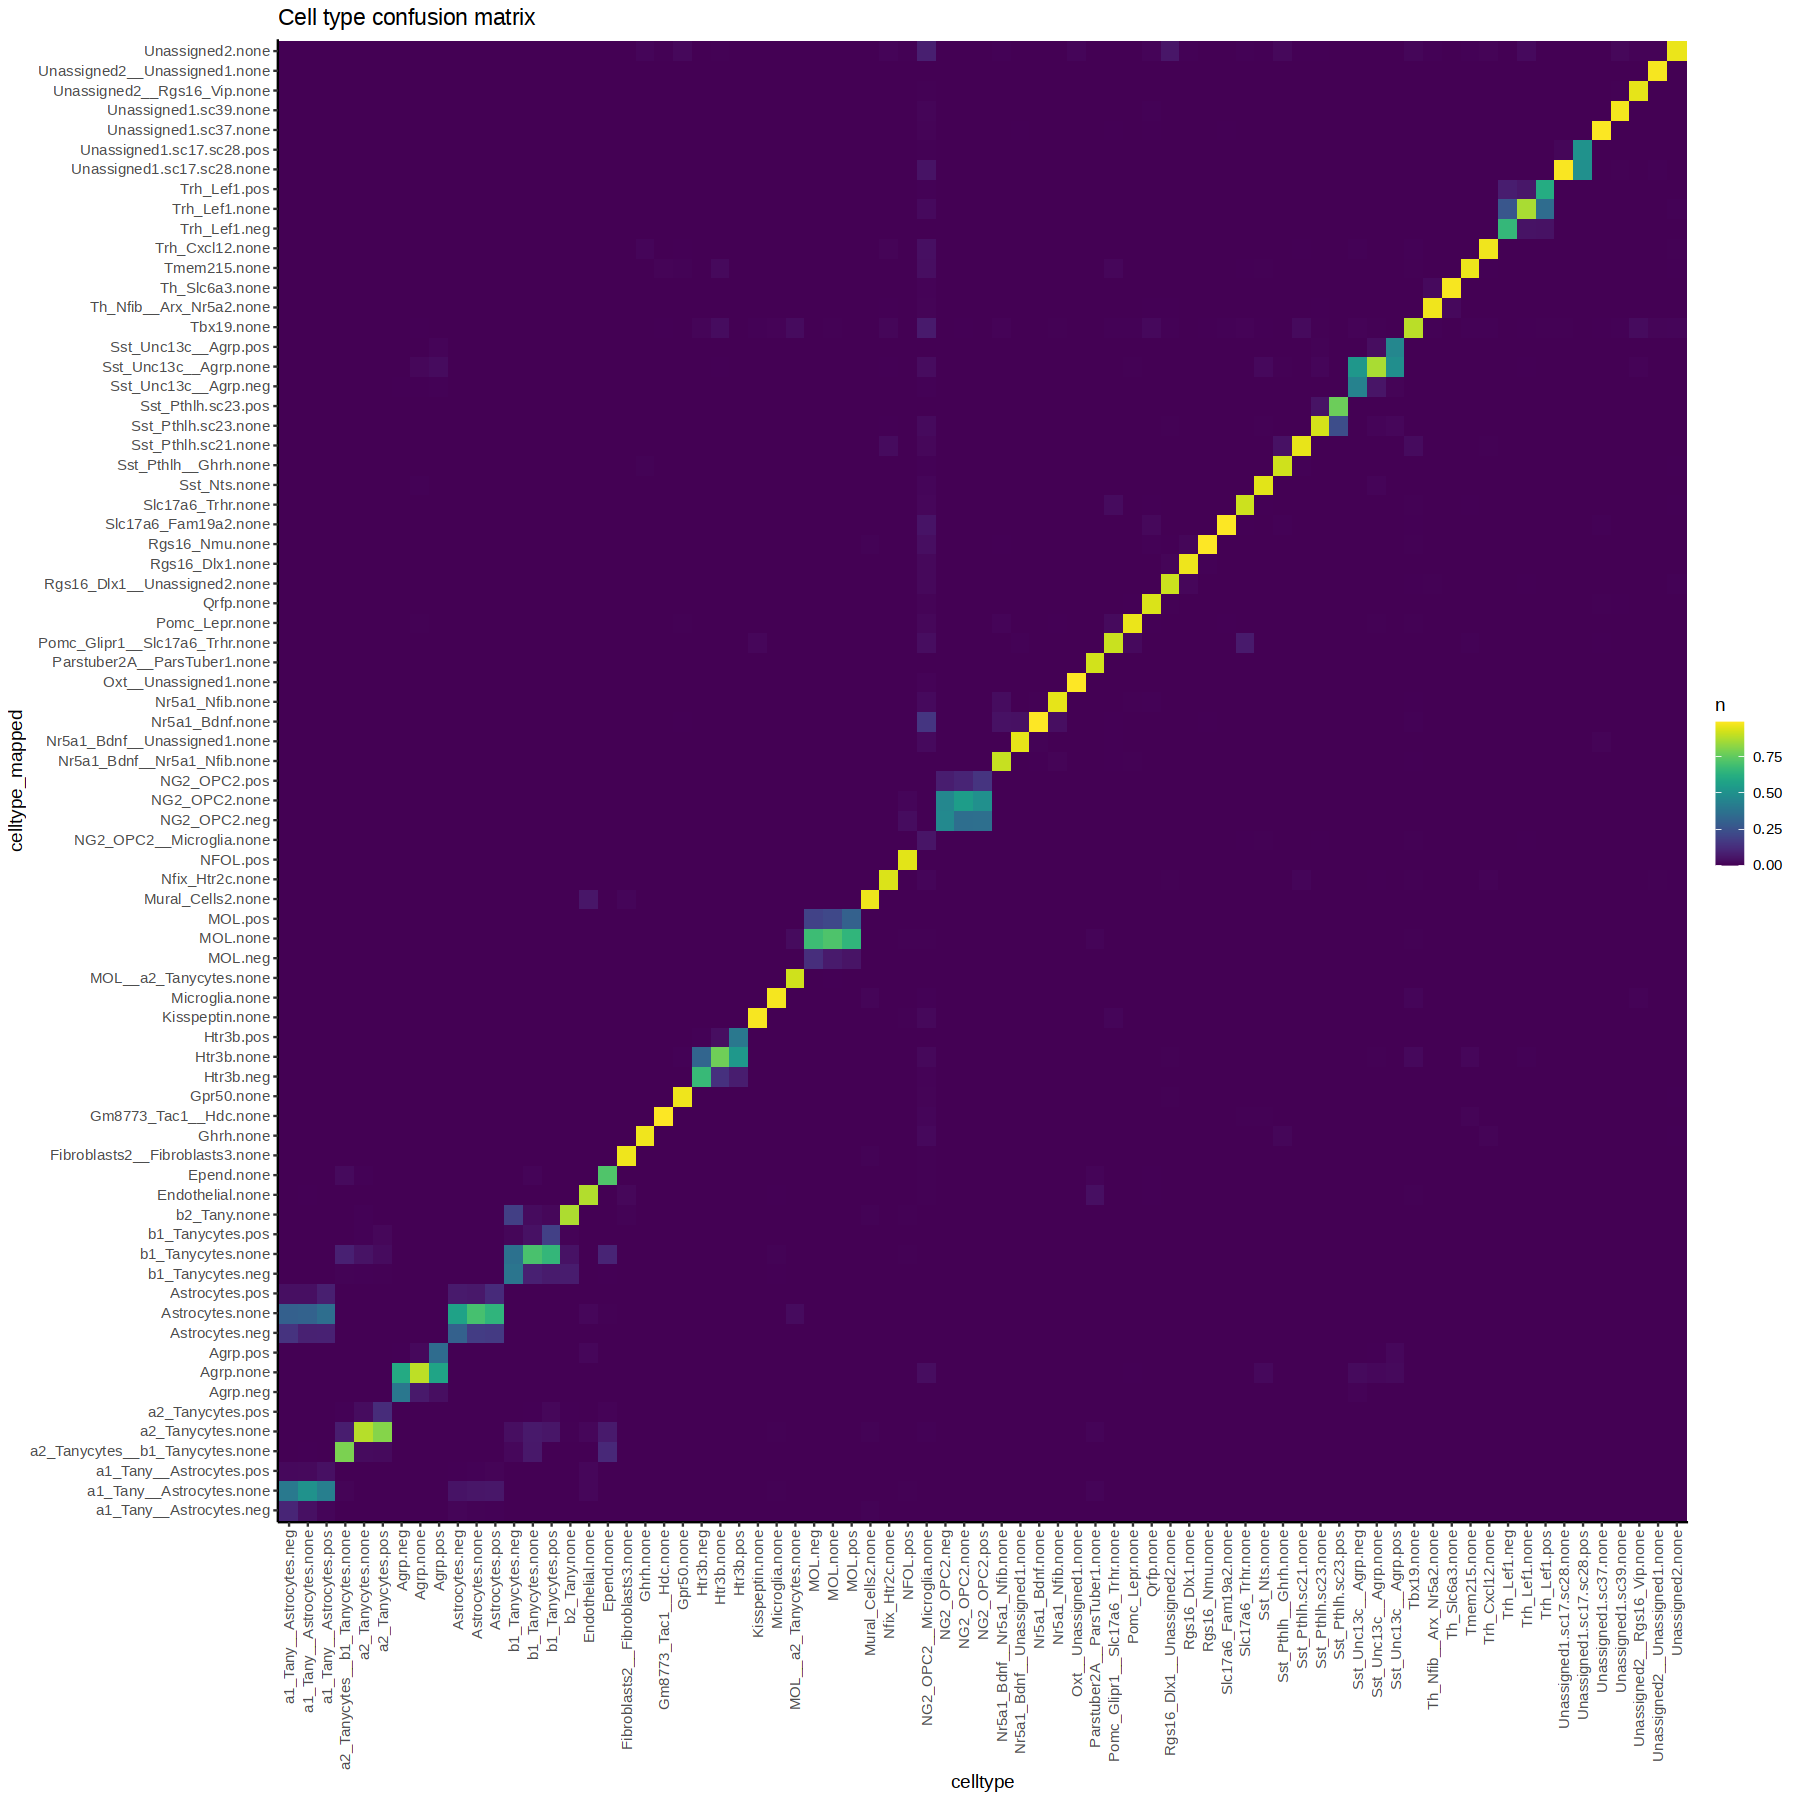

In [87]:
options(repr.plot.width=15, repr.plot.height=15)
p = plot_mapping_heatmap(celltype_mapping_gbr90$mapping, title = "Cell type confusion matrix", levels=levels)
p

In [88]:
celltype_mapping_gbr10l = get_celltype_mapping(sce , genes.selection = sg10, celltype.id = 'labels', return.stat = T)

In [ ]:
celltype_mapping_gbr20l = get_celltype_mapping(sce , genes.selection = sg20, celltype.id = 'labels', return.stat = T)

In [ ]:
celltype_mapping_gbr30l = get_celltype_mapping(sce , genes.selection = sg30, celltype.id = 'labels', return.stat = T)

In [ ]:
celltype_mapping_gbr40l = get_celltype_mapping(sce , genes.selection = sg40, celltype.id = 'labels', return.stat = T)

In [ ]:
celltype_mapping_gbr50l = get_celltype_mapping(sce , genes.selection = sg50, celltype.id = 'labels', return.stat = T)

In [ ]:
celltype_mapping_gbr60l = get_celltype_mapping(sce , genes.selection = sg60, celltype.id = 'labels', return.stat = T)

In [ ]:
celltype_mapping_gbr70l = get_celltype_mapping(sce , genes.selection = sg70, celltype.id = 'labels', return.stat = T)

In [ ]:
celltype_mapping_gbr80l = get_celltype_mapping(sce , genes.selection = sg80, celltype.id = 'labels', return.stat = T)

In [ ]:
celltype_mapping_gbr90l = get_celltype_mapping(sce , genes.selection = sg90, celltype.id = 'labels', return.stat = T)

In [90]:
stat = evaluate_library(sce, selected_genes$gene, genes.all = rownames(sce), 
#                         batch = "sample", 
                        library.size_type = "single",
                        celltype.id = "polar_label",
                        n_genes.step = 10,
                        return.cell_score_stat = T, return.gene_score_stat = T, return.celltype_stat = T,
                        verbose = T)

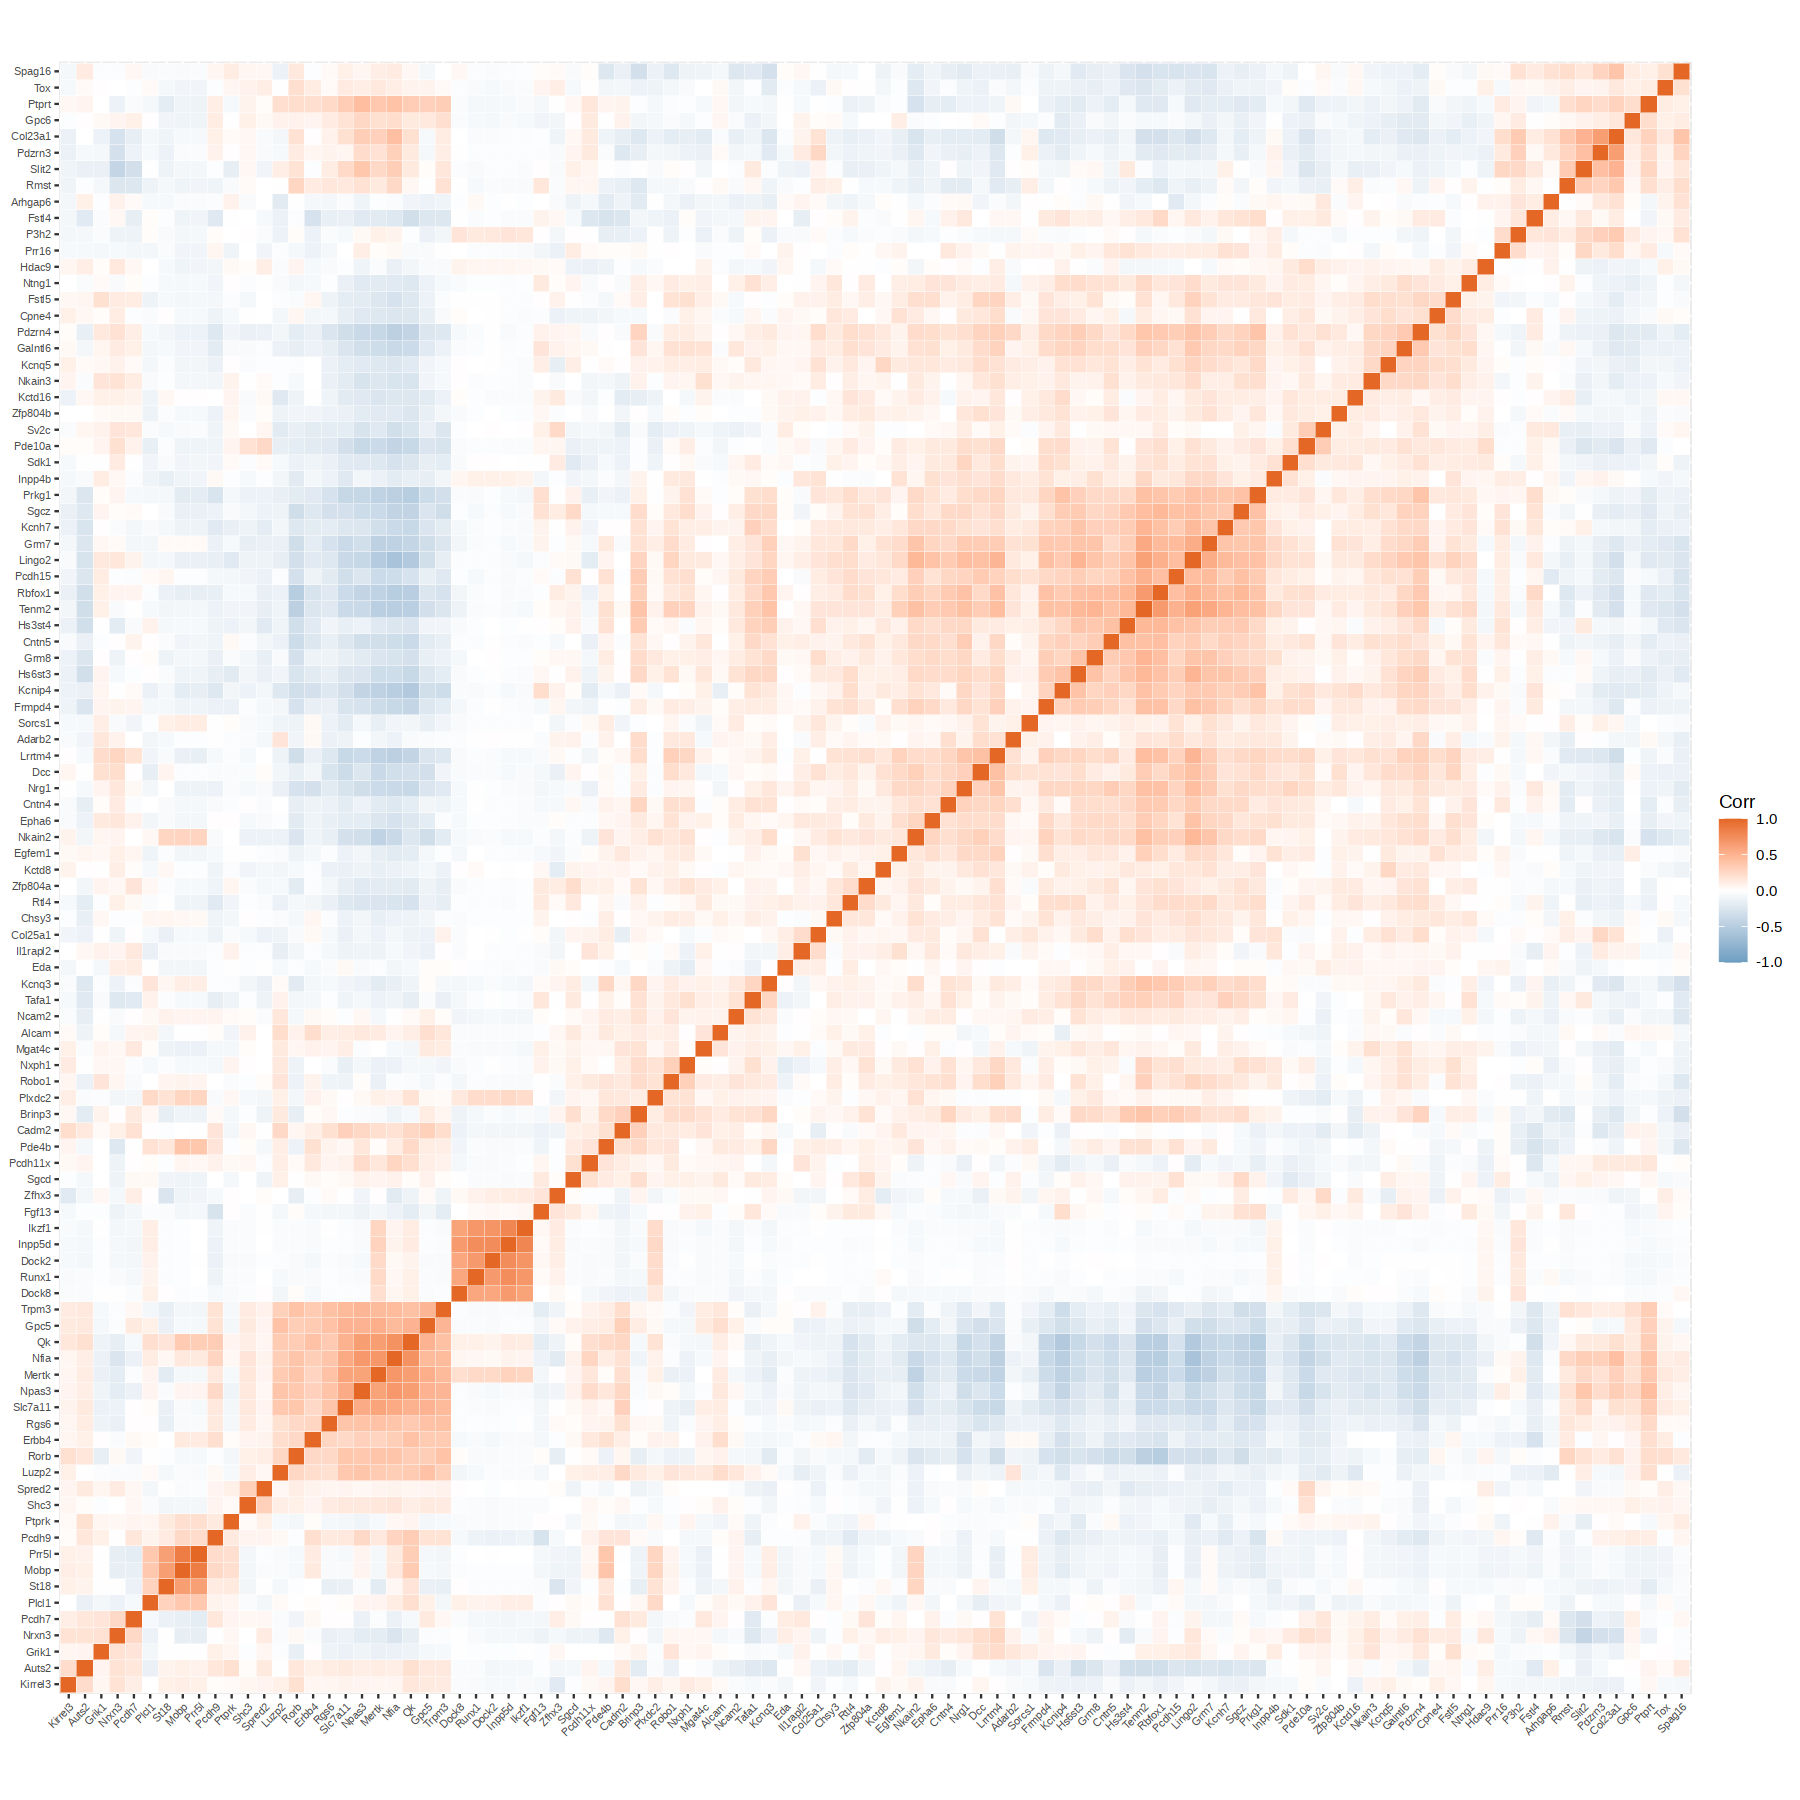

In [91]:
p_coexp = plot_coexpression(sce, genes = selected_genes$gene) 
p_coexp

In [95]:
save.image(file='gbr.Rdata')

In [98]:
redundancy_stat

ERROR: Error in eval(expr, envir, enclos): object 'redundancy_stat' not found


In [100]:
qs::qsave(selected_genes, 'selected_genes')

In [ ]:
selection_stat = evaluate_library(sce, selected_genes$gene, genes.all = rownames(sce), 
#                         batch = "sample", 
                        library.size_type = "single", celltype.id = "polar_label",
                        return.cell_score_stat = T, return.gene_score_stat = T, return.celltype_stat = T, verbose = TRUE)

In [ ]:
umaps_all = get_umap_coordinates(sce,
                                 genes = rownames(sce),
#                                  batch = "sample",
                                 nPC = 50)
colnames(umaps_all) = c("cell", "x_all", "y_all")

umaps_selection = get_umap_coordinates(sce, genes = selected_genes$gene)

In [ ]:
redundancy_stat = get_redundancy_stat(sce, selected_genes$gene, genes_to_assess = selected_genes$gene, celltype.id='polar_label') 

In [106]:
2

[1] 2

In [107]:
redundancy_stat$

ERROR: Error in parse(text = x, srcfile = src): <text>:2:0: unexpected end of input
1: redundancy_stat$
   ^


In [108]:
stat

function (x) 
{
    x
}
<bytecode: 0x562683c94250>
<environment: namespace:ggplot2>

In [112]:
p_coexp$data %>% pull(Var1) %>% levels

[1] "Kirrel3"  "Auts2"    "Grik1"    "Nrxn3"    "Pcdh7"    "Plcl1"   
  [7] "St18"     "Mobp"     "Prr5l"    "Pcdh9"    "Ptprk"    "Shc3"    
 [13] "Spred2"   "Luzp2"    "Rorb"     "Erbb4"    "Rgs6"     "Slc7a11" 
 [19] "Npas3"    "Mertk"    "Nfia"     "Qk"       "Gpc5"     "Trpm3"   
 [25] "Dock8"    "Runx1"    "Dock2"    "Inpp5d"   "Ikzf1"    "Fgf13"   
 [31] "Zfhx3"    "Sgcd"     "Pcdh11x"  "Pde4b"    "Cadm2"    "Brinp3"  
 [37] "Plxdc2"   "Robo1"    "Nxph1"    "Mgat4c"   "Alcam"    "Ncam2"   
 [43] "Tafa1"    "Kcnq3"    "Eda"      "Il1rapl2" "Col25a1"  "Chsy3"   
 [49] "Rtl4"     "Zfp804a"  "Kctd8"    "Egfem1"   "Nkain2"   "Epha6"   
 [55] "Cntn4"    "Nrg1"     "Dcc"      "Lrrtm4"   "Adarb2"   "Sorcs1"  
 [61] "Frmpd4"   "Kcnip4"   "Hs6st3"   "Grm8"     "Cntn5"    "Hs3st4"  
 [67] "Tenm2"    "Rbfox1"   "Pcdh15"   "Lingo2"   "Grm7"     "Kcnh7"   
 [73] "Sgcz"     "Prkg1"    "Inpp4b"   "Sdk1"     "Pde10a"   "Sv2c"    
 [79] "Zfp804b"  "Kctd16"   "Nkain3"   "Kcnq5"    "Galntl6"  "Pdzrn4"  
 [85] "Cpne4"    "Fstl5"    "Ntng1"    "Hdac9"    "Prr16"    "P3h2"    
 [91] "Fstl4"    "Arhgap6"  "Rmst"     "Slit2"    "Pdzrn3"   "Col23a1" 
 [97] "Gpc6"     "Ptprt"    "Tox"      "Spag16"

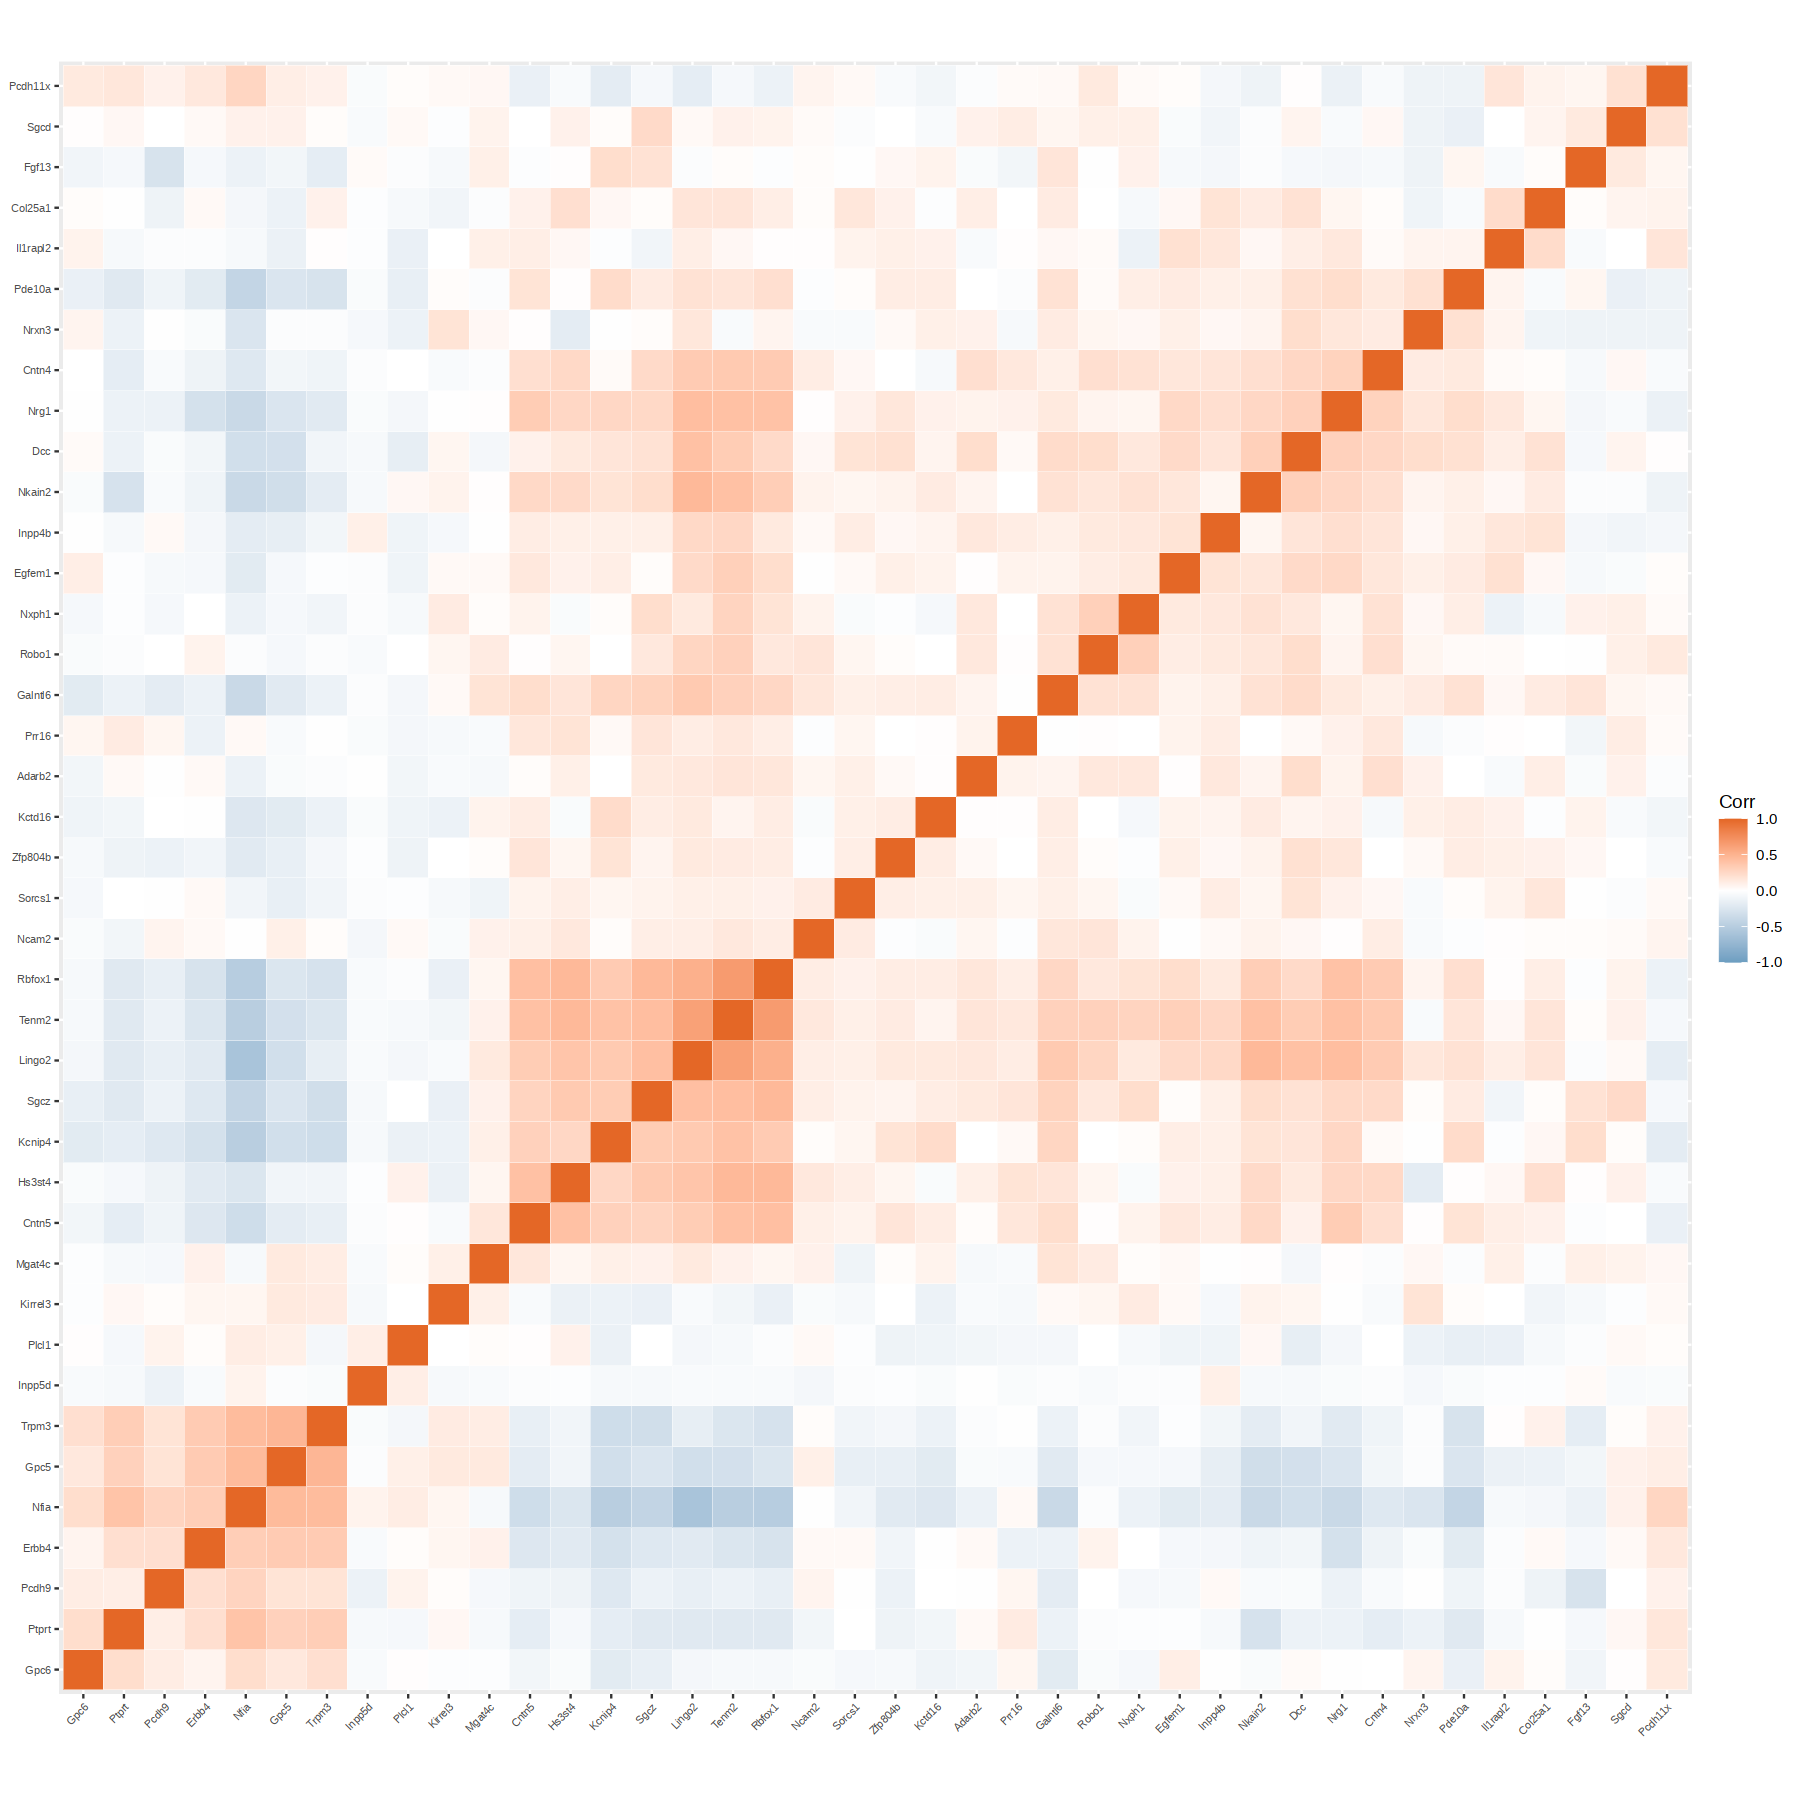

In [117]:
plot_coexpression(sce, genes = selected_genes$gene[1:40]) 